# Problem Statement

### Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('Insurance_Data.csv')

In [4]:
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [8]:
df['is_claim'].value_counts(normalize = True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

- Heavy Class imbalance

In [9]:
obj_cols = df.select_dtypes(include = 'object')
obj_no_id = obj_cols.drop('policy_id',axis = 1)
obj_no_id_names = list(obj_no_id.columns)
obj_col_names = list(obj_cols.columns)
num_cols = df.select_dtypes(include = np.number)
num_col_names = list(num_cols.columns)

In [10]:
len(obj_col_names),len(num_col_names)

(28, 16)

# EDA

## Univariate Analysis

In [11]:
for i in obj_no_id_names:
    print('******************************')
    print(i)
    print(df[i].value_counts(normalize = True))
    print('******************************')

******************************
area_cluster
C8     0.233035
C2     0.125307
C5     0.119112
C3     0.104127
C14    0.062466
C13    0.058421
C10    0.053847
C9     0.046662
C7     0.036985
C12    0.027120
C1     0.025055
C11    0.020685
C19    0.016248
C6     0.015190
C15    0.013159
C4     0.011350
C17    0.008397
C16    0.006844
C21    0.006468
C18    0.004130
C22    0.003533
C20    0.001860
Name: area_cluster, dtype: float64
******************************
******************************
segment
B2         0.312568
A          0.295621
C2         0.239248
B1         0.071221
C1         0.060708
Utility    0.020634
Name: segment, dtype: float64
******************************
******************************
model
M1     0.255120
M4     0.239248
M6     0.235117
M8     0.071221
M7     0.050177
M3     0.040500
M9     0.036080
M5     0.027273
M10    0.020634
M2     0.018433
M11    0.006195
Name: model, dtype: float64
******************************
******************************
fuel_type
Petro

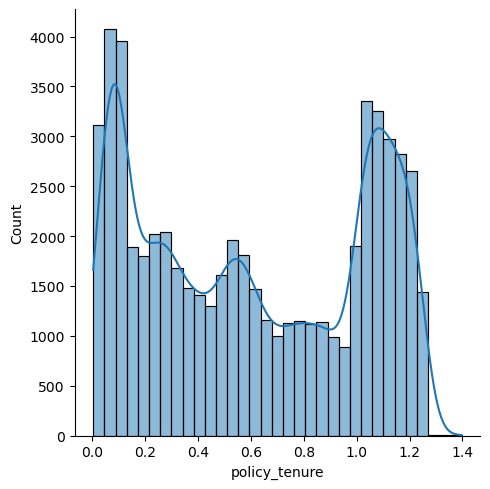

In [12]:
sns.displot(x = 'policy_tenure',data = df,kde = True)

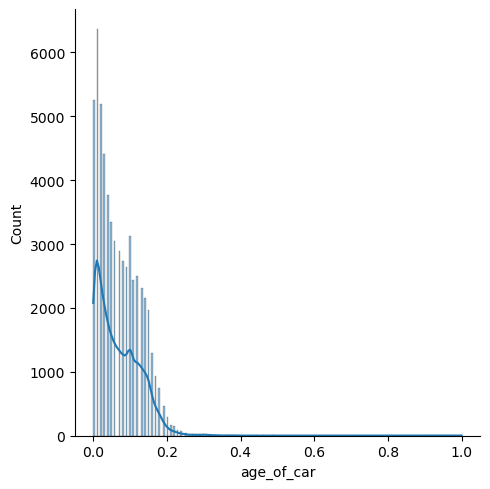

In [13]:
sns.displot(x = 'age_of_car',data = df,kde = True)

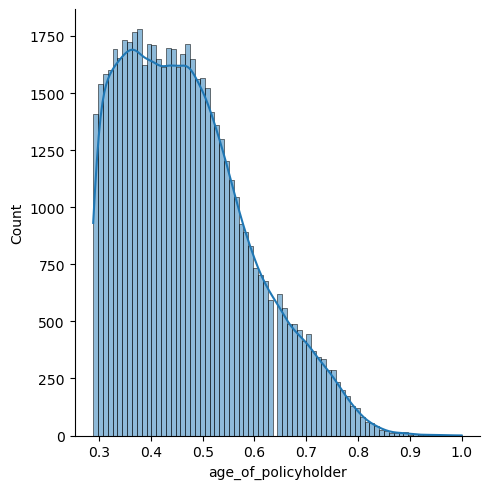

In [14]:
sns.displot(x = 'age_of_policyholder',data = df,kde = True)

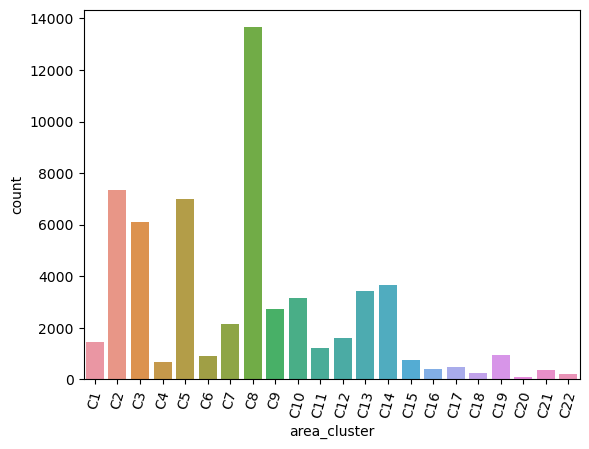

In [15]:
sns.countplot(x= 'area_cluster',data =df)
plt.xticks(rotation= 75)
plt.show()

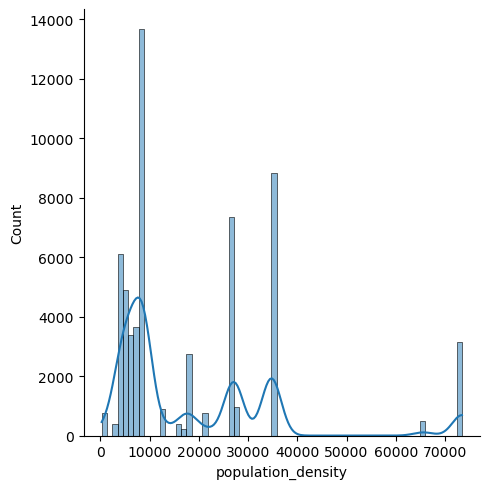

In [16]:
sns.displot(x = 'population_density',kde =True,data =df,height=5)
plt.show()

In [17]:
df['make'].value_counts()

1    38126
3    14018
2     2373
5     2114
4     1961
Name: make, dtype: int64

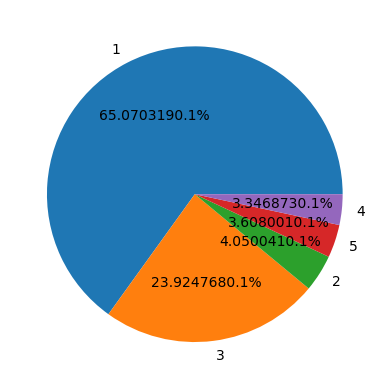

In [18]:
plt.pie(df['make'].value_counts(),labels = df['make'].value_counts().index, autopct = '%f0.1%%')
plt.show()

<AxesSubplot:xlabel='segment', ylabel='count'>

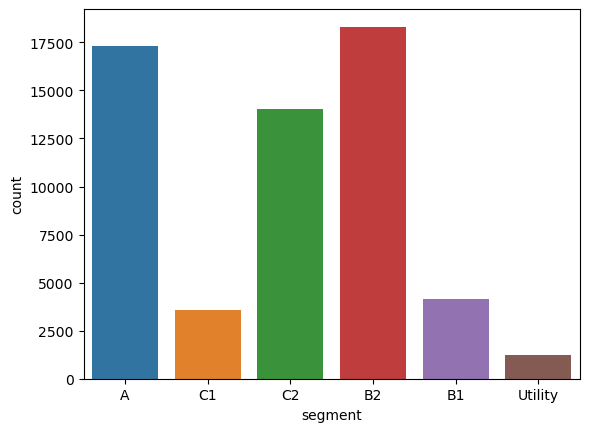

In [19]:
sns.countplot(x= 'segment',data =df)

<AxesSubplot:xlabel='model', ylabel='count'>

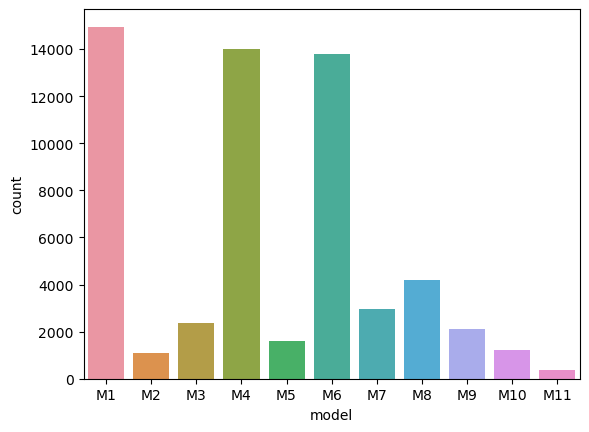

In [20]:
sns.countplot(x= 'model',data =df)

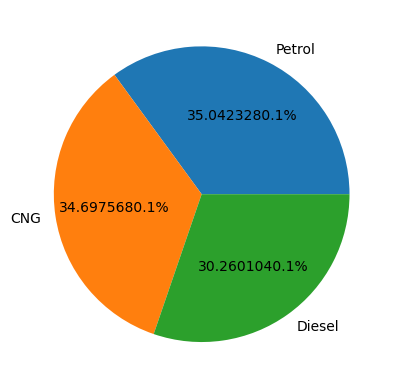

In [21]:
plt.pie(df['fuel_type'].value_counts(),labels = df['fuel_type'].value_counts().index, autopct = '%f0.1%%')
plt.show()

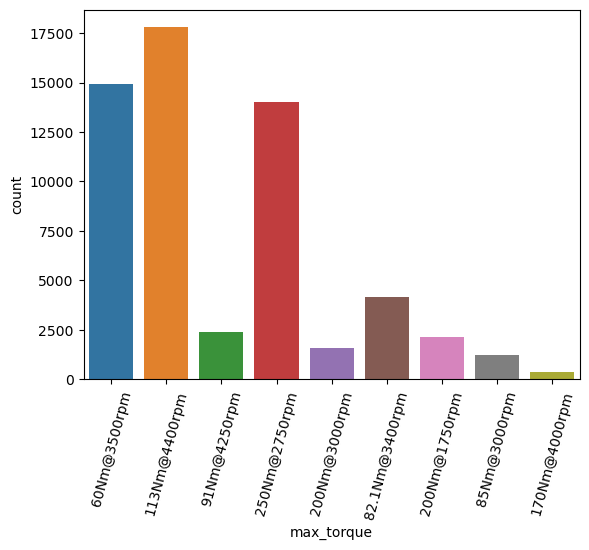

In [22]:
sns.countplot(x= 'max_torque',data =df)
plt.xticks(rotation = 75)
plt.show()

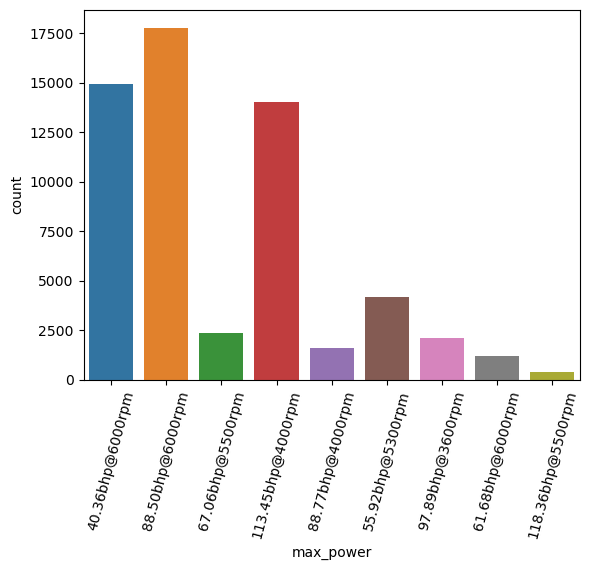

In [23]:
sns.countplot(x= 'max_power',data =df)
plt.xticks(rotation = 75)
plt.show()

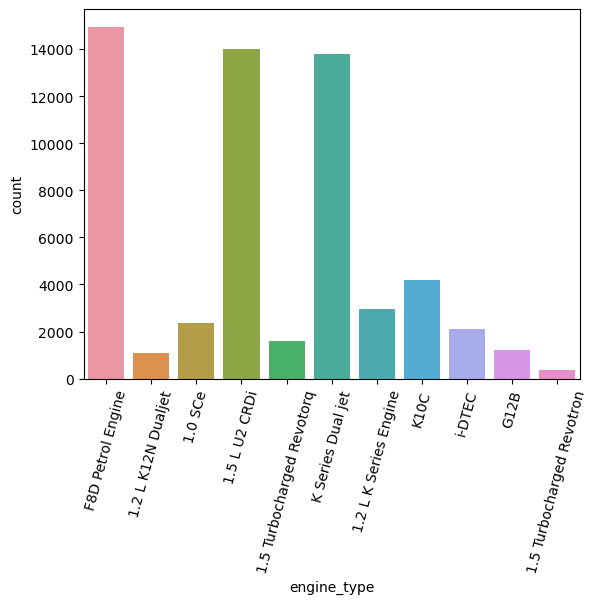

In [24]:
sns.countplot(x= 'engine_type',data =df)
plt.xticks(rotation = 75)
plt.show()

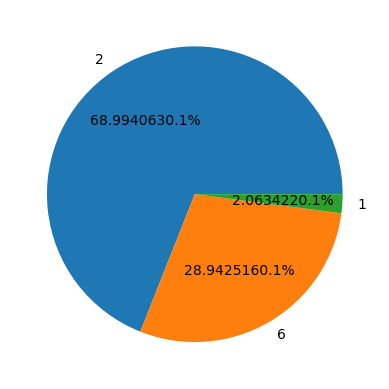

In [25]:
plt.pie(df['airbags'].value_counts(),labels = df['airbags'].value_counts().index, autopct = '%f0.1%%')
plt.show()

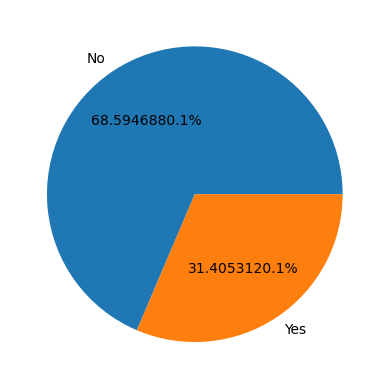

In [26]:
plt.pie(df['is_esc'].value_counts(),labels = df['is_esc'].value_counts().index, autopct = '%f0.1%%')
plt.show()

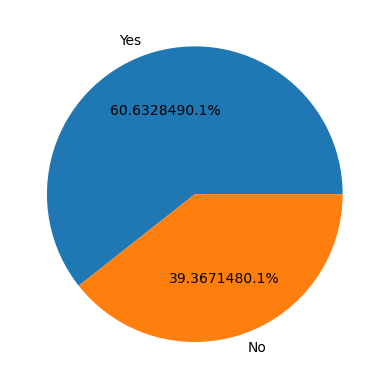

In [27]:
plt.pie(df['is_adjustable_steering'].value_counts(),labels = df['is_adjustable_steering'].value_counts().index, autopct = '%f0.1%%')
plt.show()

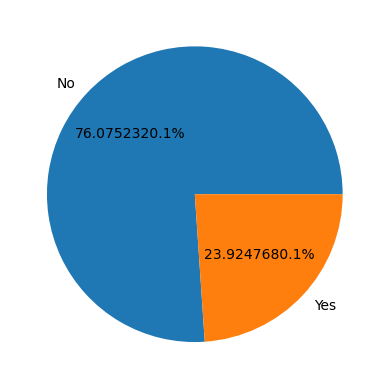

In [28]:
plt.pie(df['is_tpms'].value_counts(),labels = df['is_tpms'].value_counts().index, autopct = '%f0.1%%')
plt.show()

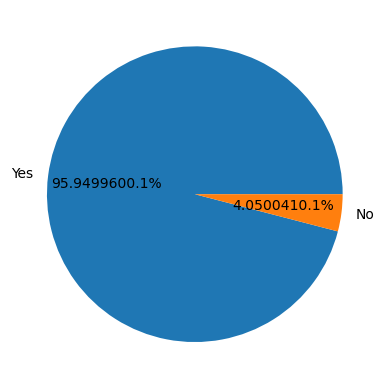

In [29]:
plt.pie(df['is_parking_sensors'].value_counts(),labels = df['is_parking_sensors'].value_counts().index, autopct = '%f0.1%%')
plt.show()

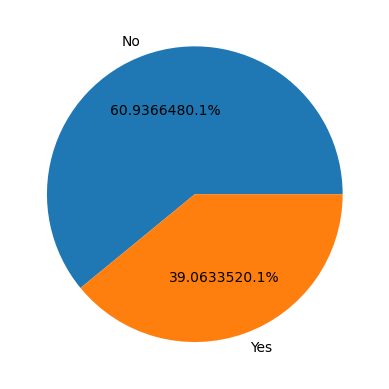

In [30]:
plt.pie(df['is_parking_camera'].value_counts(),labels = df['is_parking_camera'].value_counts().index, autopct = '%f0.1%%')
plt.show()

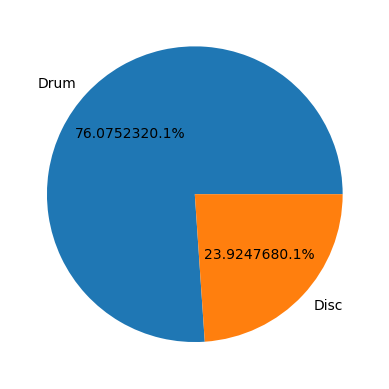

In [31]:
plt.pie(df['rear_brakes_type'].value_counts(),labels = df['rear_brakes_type'].value_counts().index, autopct = '%f0.1%%')
plt.show()

<AxesSubplot:xlabel='displacement', ylabel='count'>

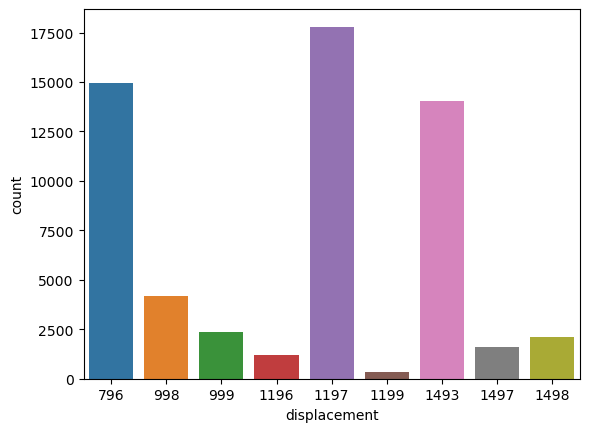

In [32]:
sns.countplot(x = 'displacement',data =df)

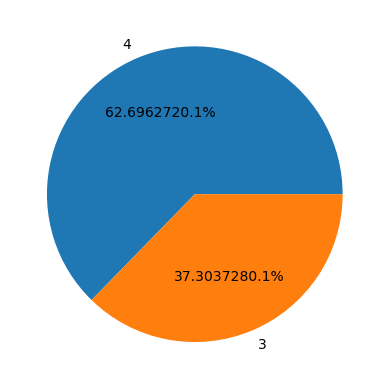

In [33]:
plt.pie(df['cylinder'].value_counts(),labels = df['cylinder'].value_counts().index, autopct = '%f0.1%%')
plt.show()

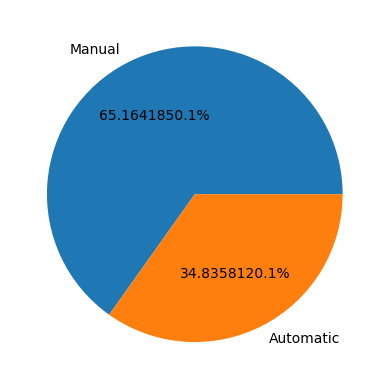

In [34]:
plt.pie(df['transmission_type'].value_counts(),labels = df['transmission_type'].value_counts().index, autopct = '%f0.1%%')
plt.show()

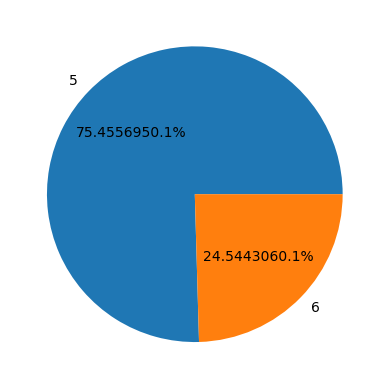

In [35]:
plt.pie(df['gear_box'].value_counts(),labels = df['gear_box'].value_counts().index, autopct = '%f0.1%%')
plt.show()

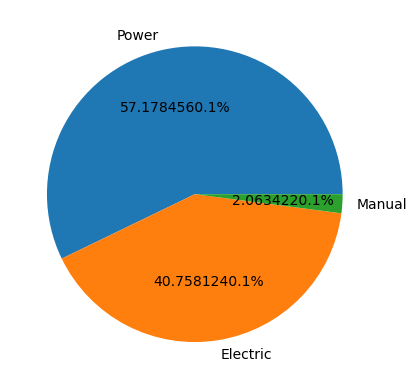

In [36]:
plt.pie(df['steering_type'].value_counts(),labels = df['steering_type'].value_counts().index, autopct = '%f0.1%%')
plt.show()

<AxesSubplot:xlabel='turning_radius', ylabel='count'>

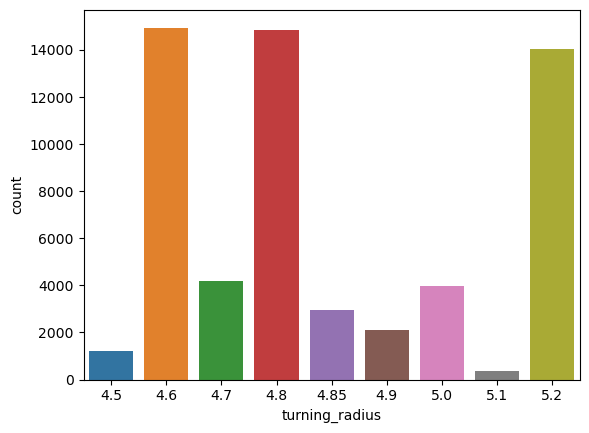

In [37]:
sns.countplot(x = 'turning_radius',data=df )

<AxesSubplot:xlabel='length', ylabel='count'>

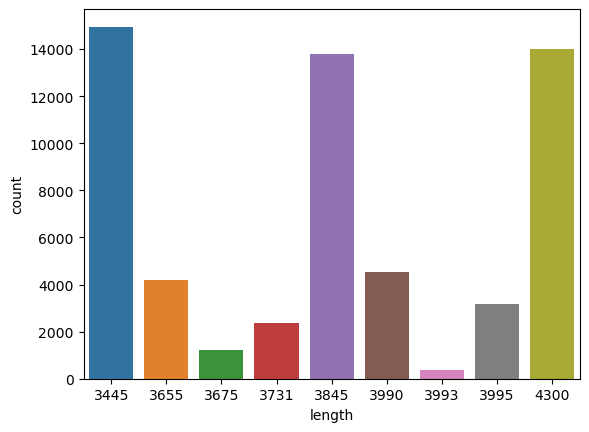

In [38]:
sns.countplot(x = 'length',data=df )

<AxesSubplot:xlabel='width', ylabel='count'>

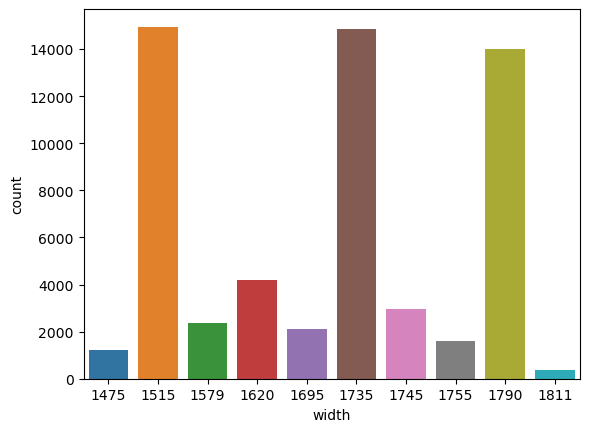

In [39]:
sns.countplot(x = 'width',data=df )

<AxesSubplot:xlabel='height', ylabel='count'>

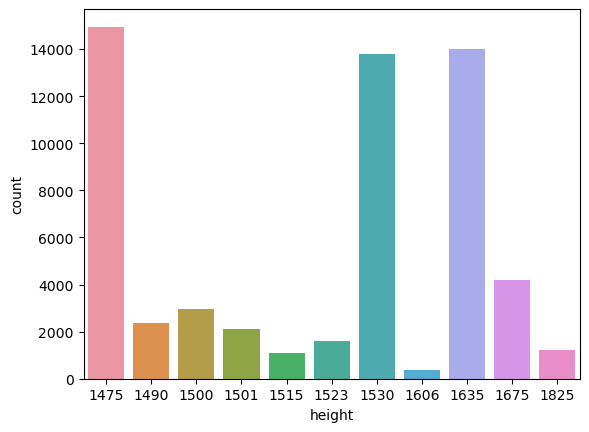

In [40]:
sns.countplot(x = 'height',data=df )

<AxesSubplot:xlabel='gross_weight', ylabel='count'>

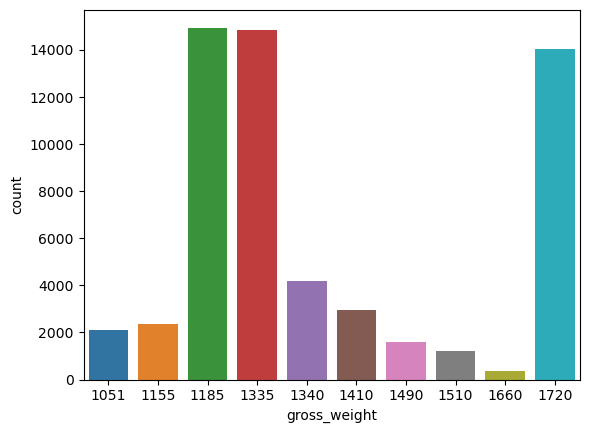

In [41]:
sns.countplot(x = 'gross_weight',data=df )

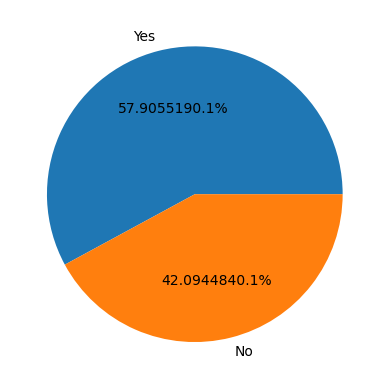

In [42]:
plt.pie(df['is_front_fog_lights'].value_counts(),labels = df['is_front_fog_lights'].value_counts().index, autopct = '%f0.1%%')
plt.show()

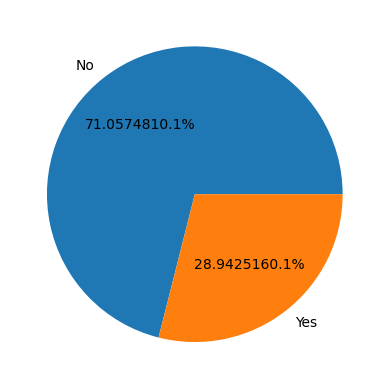

In [43]:
plt.pie(df['is_rear_window_wiper'].value_counts(),labels = df['is_rear_window_wiper'].value_counts().index, autopct = '%f0.1%%')
plt.show()

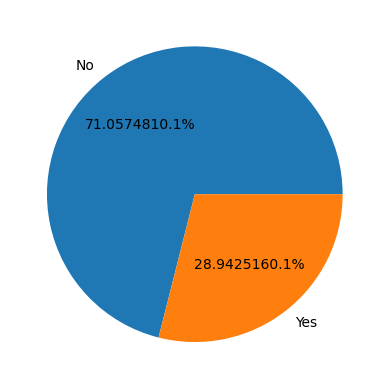

In [44]:
plt.pie(df['is_rear_window_washer'].value_counts(),labels = df['is_rear_window_washer'].value_counts().index, autopct = '%f0.1%%')
plt.show()

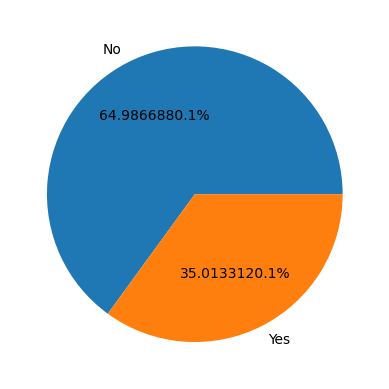

In [45]:
plt.pie(df['is_rear_window_defogger'].value_counts(),labels = df['is_rear_window_defogger'].value_counts().index, autopct = '%f0.1%%')
plt.show()

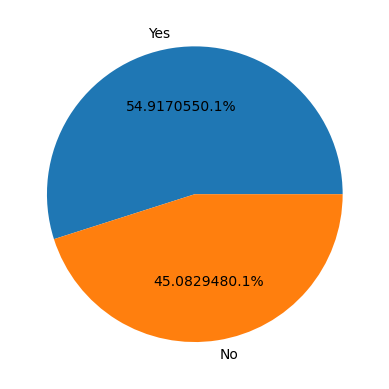

In [46]:
plt.pie(df['is_brake_assist'].value_counts(),labels = df['is_brake_assist'].value_counts().index, autopct = '%f0.1%%')
plt.show()

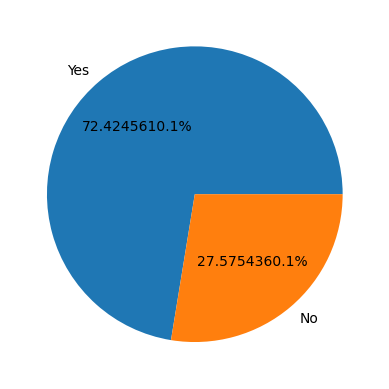

In [47]:
plt.pie(df['is_power_door_locks'].value_counts(),labels = df['is_power_door_locks'].value_counts().index, autopct = '%f0.1%%')
plt.show()

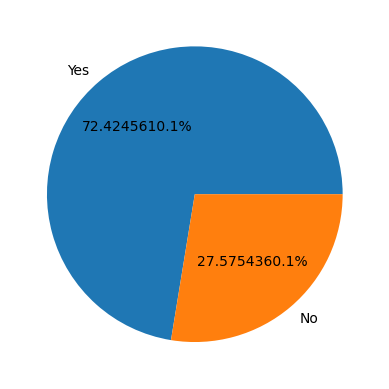

In [48]:
plt.pie(df['is_central_locking'].value_counts(),labels = df['is_central_locking'].value_counts().index, autopct = '%f0.1%%')
plt.show()

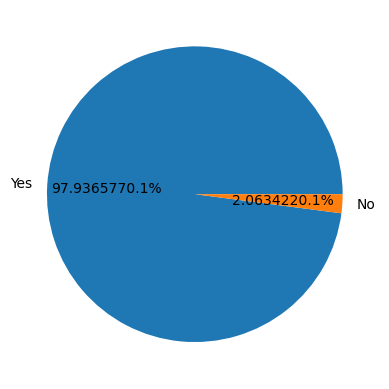

In [49]:
plt.pie(df['is_power_steering'].value_counts(),labels = df['is_power_steering'].value_counts().index, autopct = '%f0.1%%')
plt.show()

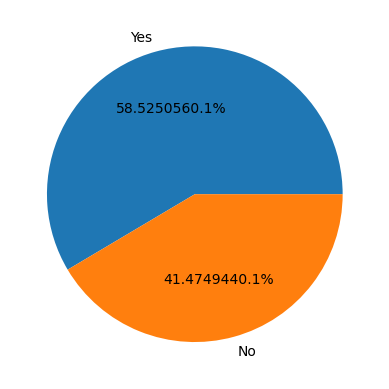

In [50]:
plt.pie(df['is_driver_seat_height_adjustable'].value_counts(),labels = df['is_driver_seat_height_adjustable'].value_counts().index, autopct = '%f0.1%%')
plt.show()

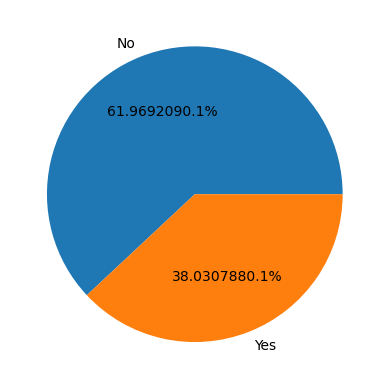

In [51]:
plt.pie(df['is_day_night_rear_view_mirror'].value_counts(),labels = df['is_day_night_rear_view_mirror'].value_counts().index, autopct = '%f0.1%%')
plt.show()

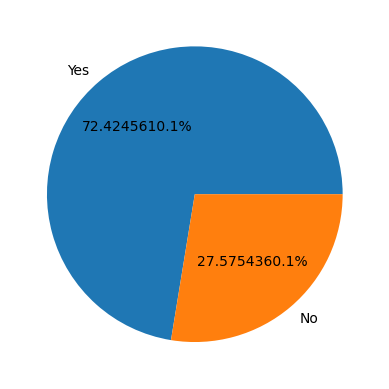

In [52]:
plt.pie(df['is_ecw'].value_counts(),labels = df['is_ecw'].value_counts().index, autopct = '%f0.1%%')
plt.show()

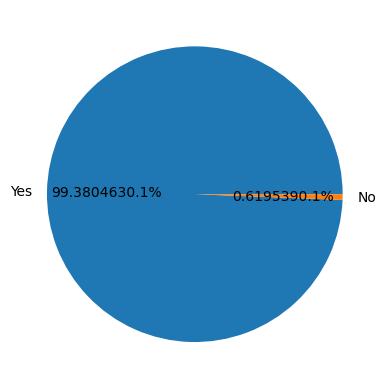

In [53]:
plt.pie(df['is_speed_alert'].value_counts(),labels = df['is_speed_alert'].value_counts().index, autopct = '%f0.1%%')
plt.show()

<AxesSubplot:xlabel='ncap_rating', ylabel='count'>

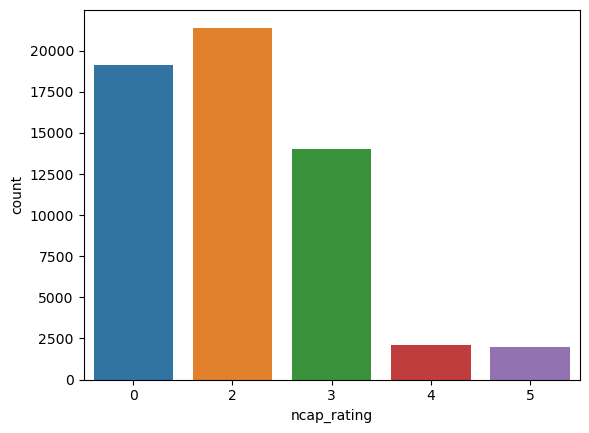

In [54]:
sns.countplot(x ='ncap_rating' ,data = df)

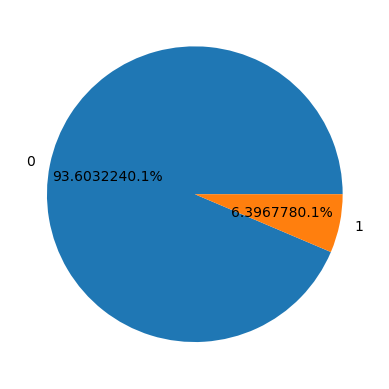

In [55]:
plt.pie(df['is_claim'].value_counts(),labels = df['is_claim'].value_counts().index, autopct = '%f0.1%%')
plt.show()

#### Outlier Check

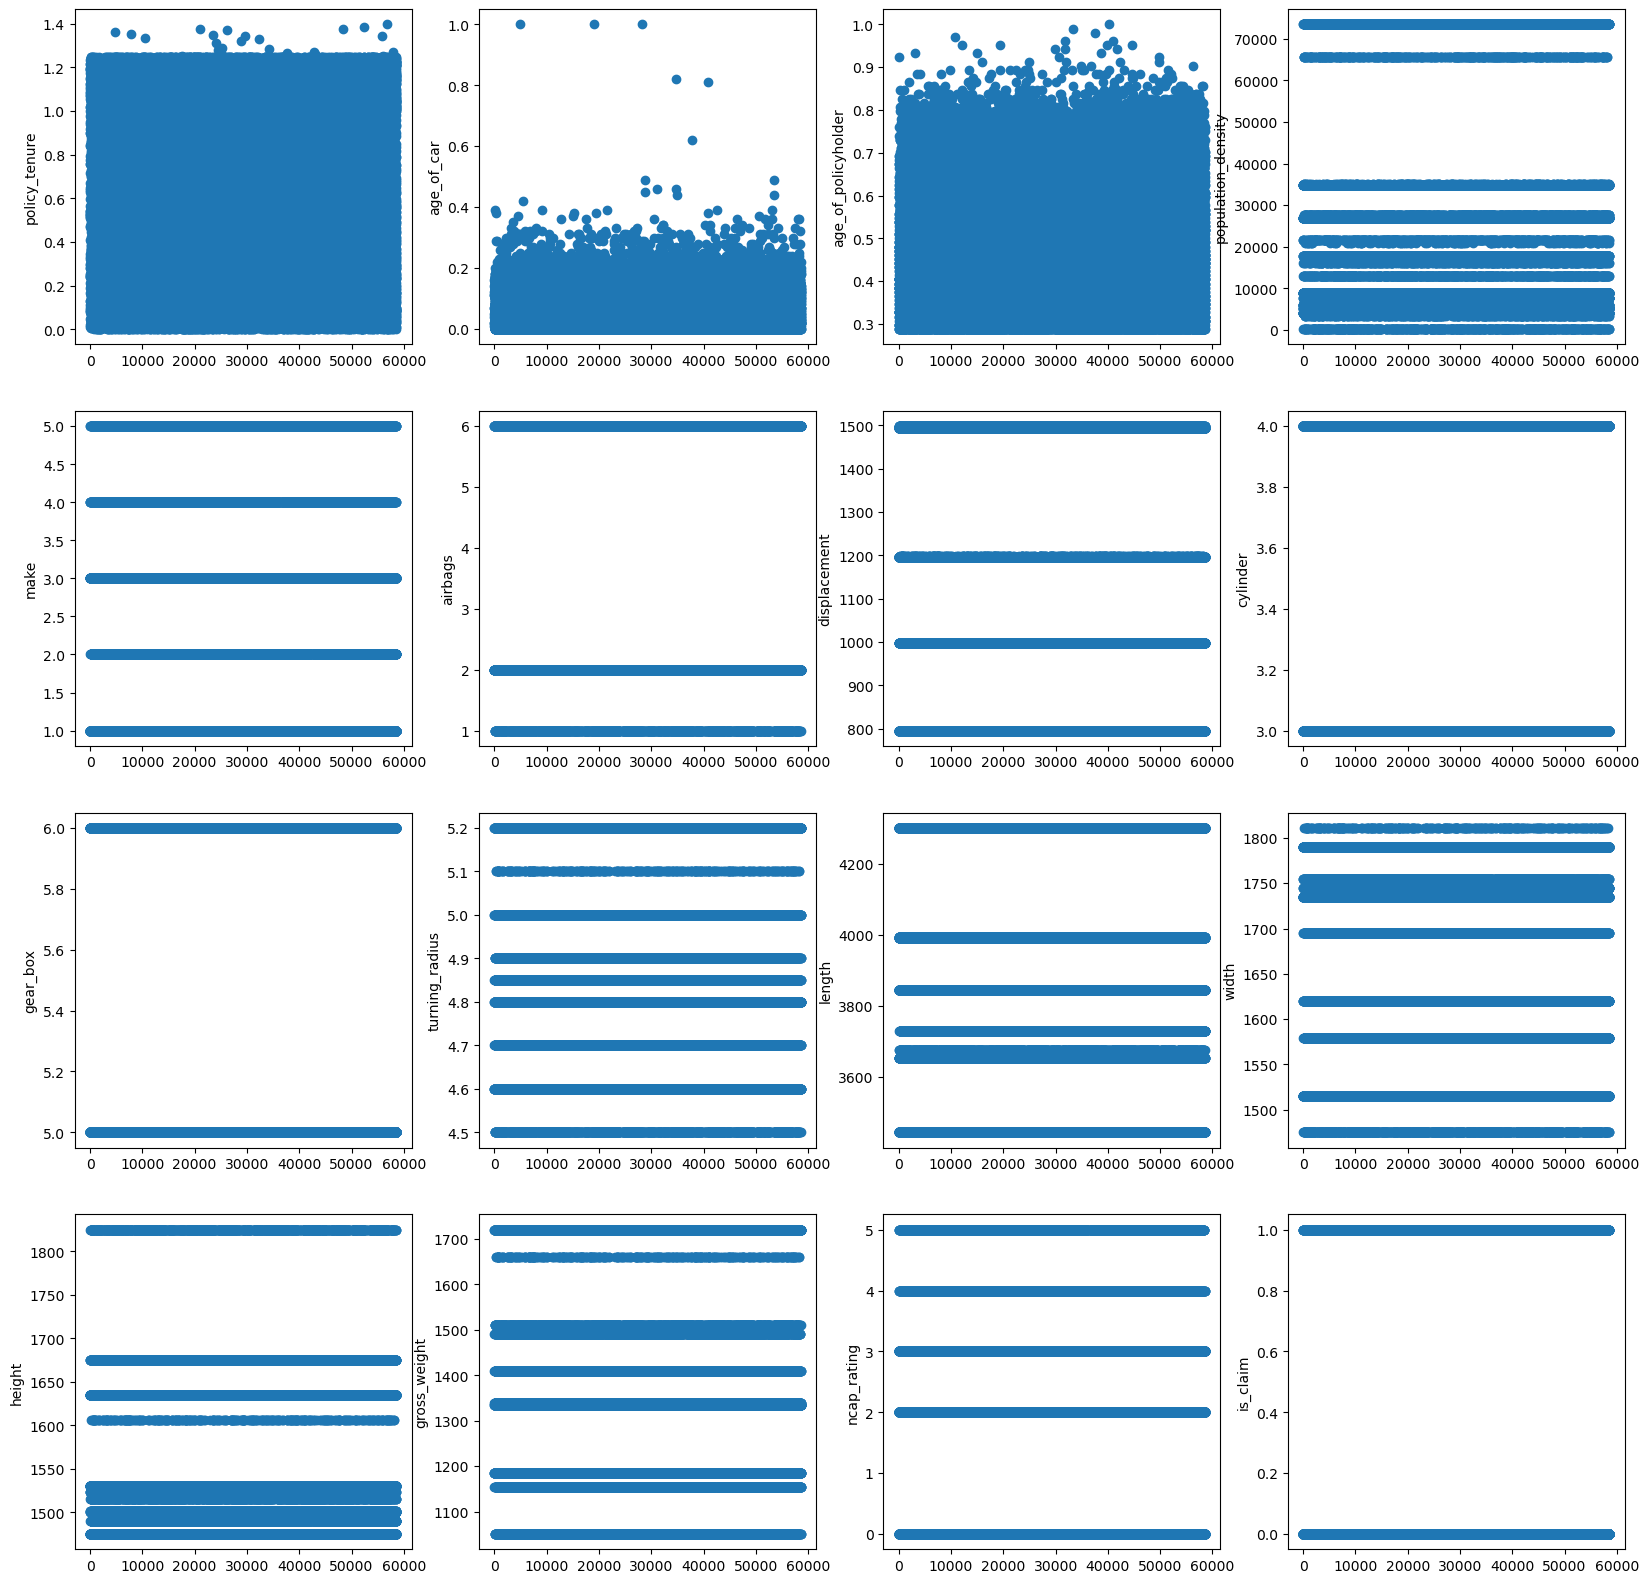

In [56]:
rows = 4
col  = 4
col_index = 0
fig ,ax = plt.subplots(nrows = rows ,ncols = col,figsize = [20,20])
for i in range(rows):
    for j in range(col):
       
        ax[i][j].scatter(y = df[num_col_names[col_index]],x = num_cols.index)
        ax[i][j].set_ylabel(num_col_names[col_index])
        col_index = col_index + 1

- Age of the car seems to have outliers but they should be important for understanding claims filed

## Bivariate Analysis

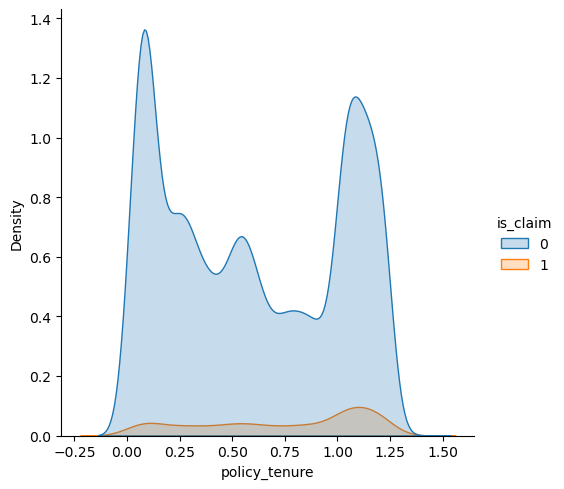

In [57]:
sns.displot(x = 'policy_tenure',data = df,kind ='kde',hue ='is_claim',fill =True )

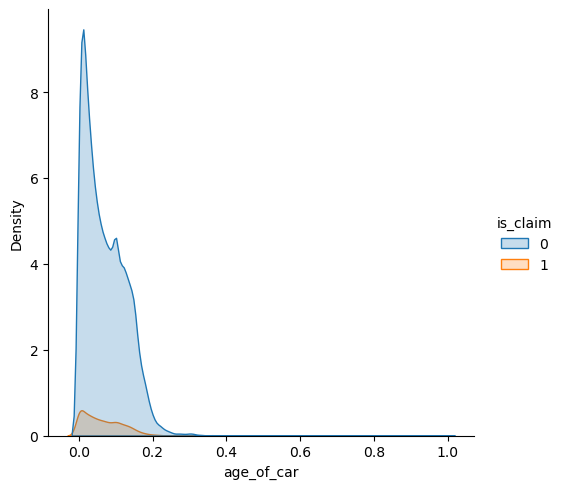

In [58]:
sns.displot(x = 'age_of_car',data = df,kind ='kde',hue ='is_claim',fill = True )

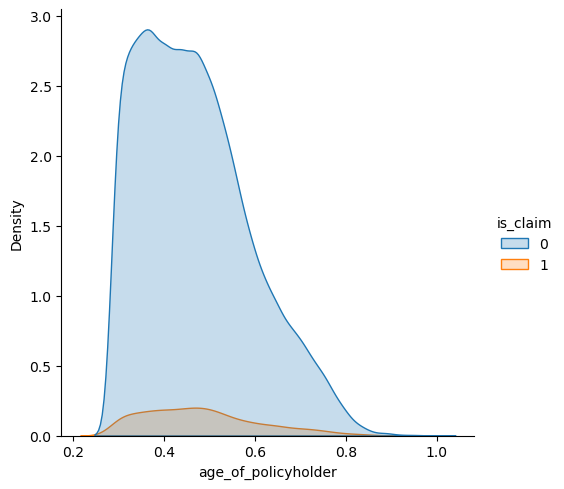

In [59]:
sns.displot(x = 'age_of_policyholder',data = df,kind ='kde',hue ='is_claim',fill = True )

In [60]:
def get_precentage_target(index,column):
    cross = pd.crosstab(index,column,margins = True )
    cross['Percentage_of_claim_filed'] = (cross[1]/cross['All']*100)
    return cross
area_cluster_ct = get_precentage_target(df['area_cluster'],df['is_claim'])
area_cluster_ct
    

is_claim,0,1,All,Percentage_of_claim_filed
area_cluster,,,,
C1,1392,76,1468,5.177112
C10,3007,148,3155,4.690967
C11,1140,72,1212,5.940594
C12,1502,87,1589,5.475142
C13,3228,195,3423,5.696757
C14,3379,281,3660,7.677596
C15,733,38,771,4.928664
C16,378,23,401,5.735661
C17,473,19,492,3.861789


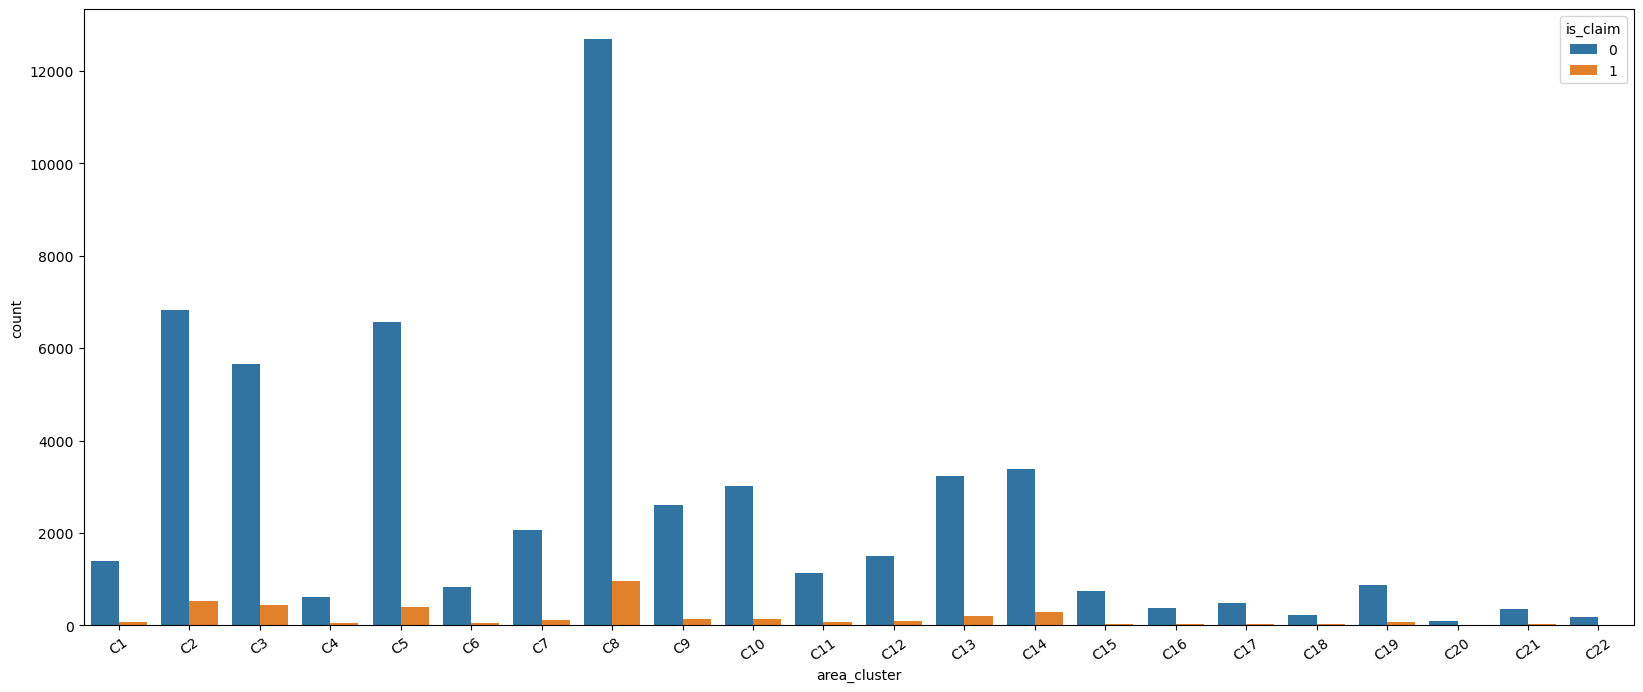

In [61]:
plt.figure(figsize = [20,8])
sns.countplot(x = 'area_cluster',data = df, hue = 'is_claim')
plt.xticks(rotation= 35)
plt.show()

- c18 is the area with the highest percentage of claims filed whereas c17 has the lowest 

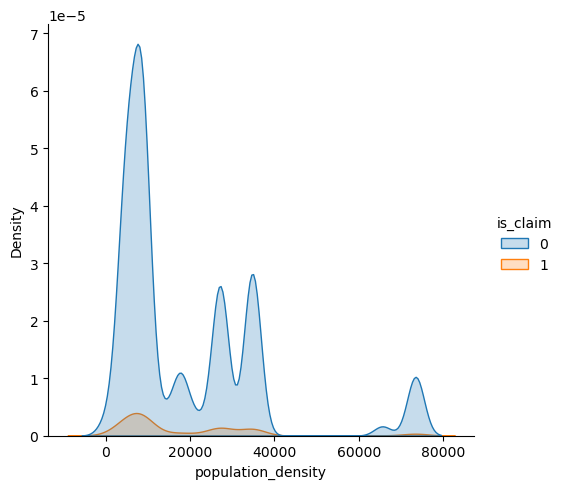

In [62]:
sns.displot(x = 'population_density',data = df,kind ='kde',hue ='is_claim',fill = True )

In [63]:
make_ct = get_precentage_target(df['make'],df['is_claim'])
make_ct

is_claim,0,1,All,Percentage_of_claim_filed
make,,,,
1,35671,2455,38126,6.439175
2,2245,128,2373,5.394016
3,13117,901,14018,6.427450
4,1830,131,1961,6.680265
5,1981,133,2114,6.291391
All,54844,3748,58592,6.396778


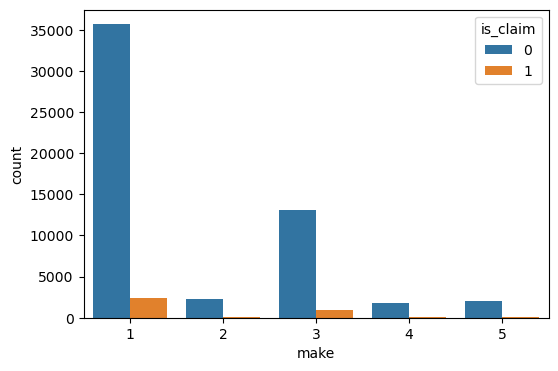

In [64]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'make',data = df, hue = 'is_claim')
plt.show()

- Make does not seem to have much effect on the percentage of claims filed

In [65]:
segment_ct = get_precentage_target(df['segment'],df['is_claim'])
segment_ct

is_claim,0,1,All,Percentage_of_claim_filed
segment,,,,
A,16275,1046,17321,6.038912
B1,3929,244,4173,5.847112
B2,17058,1256,18314,6.858141
C1,3329,228,3557,6.409896
C2,13117,901,14018,6.427450
Utility,1136,73,1209,6.038048
All,54844,3748,58592,6.396778


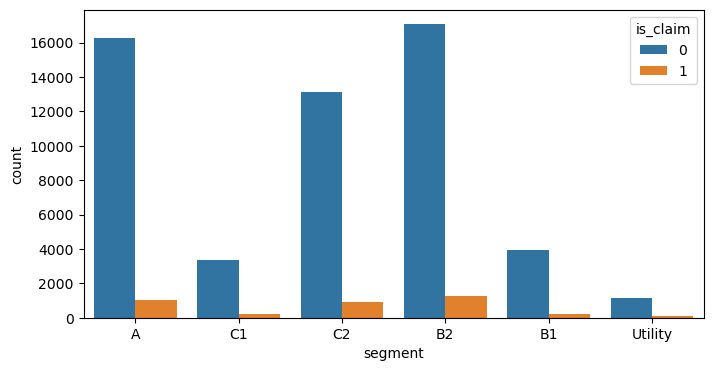

In [66]:
plt.figure(figsize = [8,4])
sns.countplot(x = 'segment',data = df, hue = 'is_claim')
plt.show()

In [67]:
model_ct = get_precentage_target(df['model'],df['is_claim'])
model_ct

is_claim,0,1,All,Percentage_of_claim_filed
model,,,,
M1,14030,918,14948,6.141290
M10,1136,73,1209,6.038048
M11,348,15,363,4.132231
M2,1000,80,1080,7.407407
M3,2245,128,2373,5.394016
M4,13117,901,14018,6.427450
M5,1482,116,1598,7.259074
M6,12837,939,13776,6.816202
M7,2739,201,2940,6.836735


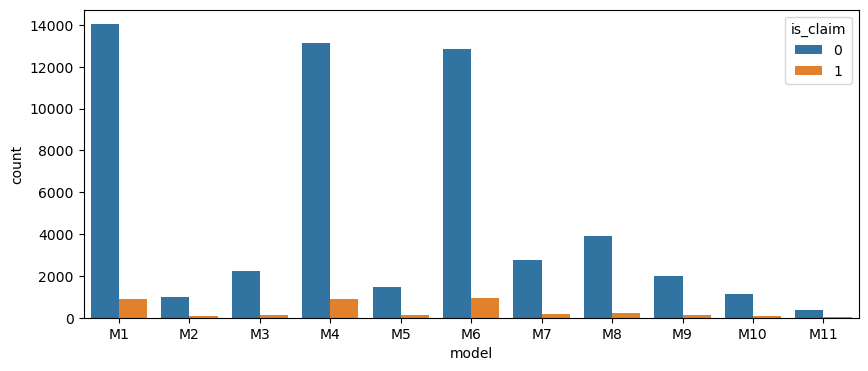

In [68]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'model',hue = 'is_claim',data =df)
plt.show()

- Model M5 has the highest Percentage of claim filed while m11 has the lowest

In [69]:
fuel_type_ct = get_precentage_target(df['fuel_type'],df['is_claim'])
fuel_type_ct

is_claim,0,1,All,Percentage_of_claim_filed
fuel_type,,,,
CNG,19095,1235,20330,6.074766
Diesel,16580,1150,17730,6.486182
Petrol,19169,1363,20532,6.638418
All,54844,3748,58592,6.396778


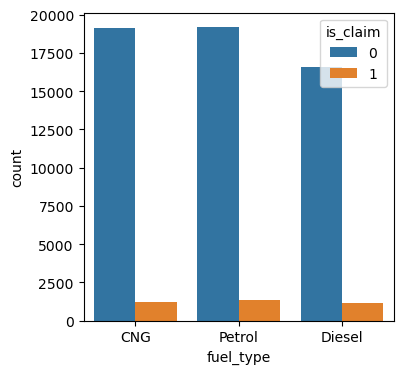

In [70]:
plt.figure(figsize = [4,4])
sns.countplot(x = 'fuel_type',hue = 'is_claim',data =df)
plt.show()

In [71]:
max_torque_ct = get_precentage_target(df['max_torque'],df['is_claim'])
max_torque_ct

is_claim,0,1,All,Percentage_of_claim_filed
max_torque,,,,
113Nm@4400rpm,16576,1220,17796,6.855473
170Nm@4000rpm,348,15,363,4.132231
200Nm@1750rpm,1981,133,2114,6.291391
200Nm@3000rpm,1482,116,1598,7.259074
250Nm@2750rpm,13117,901,14018,6.427450
60Nm@3500rpm,14030,918,14948,6.141290
82.1Nm@3400rpm,3929,244,4173,5.847112
85Nm@3000rpm,1136,73,1209,6.038048
91Nm@4250rpm,2245,128,2373,5.394016


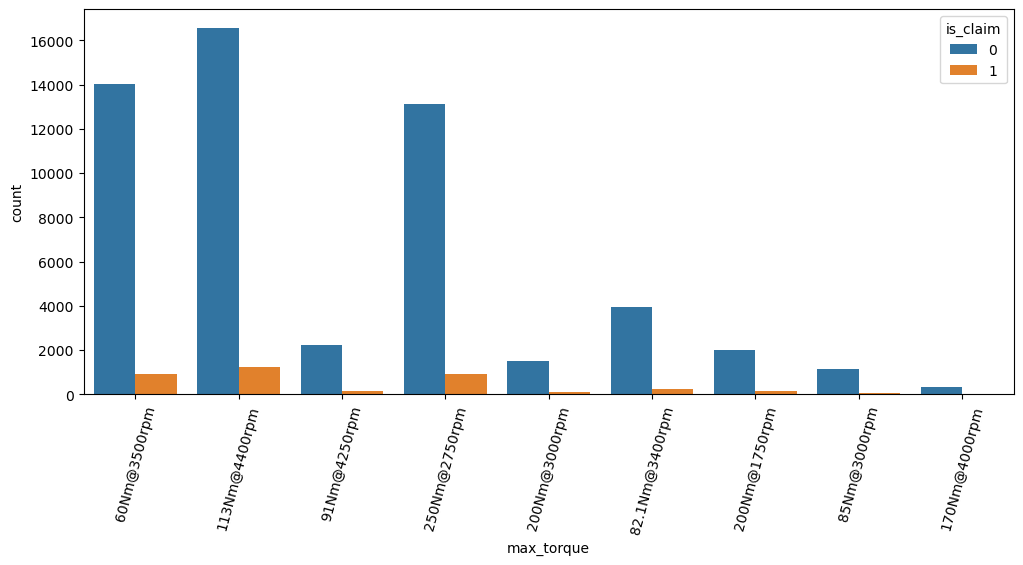

In [72]:
plt.figure(figsize = [12,5])
sns.countplot(x = 'max_torque',hue = 'is_claim',data =df)
plt.xticks(rotation = 75)
plt.show()

In [73]:
max_power_ct = get_precentage_target(df['max_power'],df['is_claim'])
max_power_ct

is_claim,0,1,All,Percentage_of_claim_filed
max_power,,,,
113.45bhp@4000rpm,13117,901,14018,6.427450
118.36bhp@5500rpm,348,15,363,4.132231
40.36bhp@6000rpm,14030,918,14948,6.141290
55.92bhp@5300rpm,3929,244,4173,5.847112
61.68bhp@6000rpm,1136,73,1209,6.038048
67.06bhp@5500rpm,2245,128,2373,5.394016
88.50bhp@6000rpm,16576,1220,17796,6.855473
88.77bhp@4000rpm,1482,116,1598,7.259074
97.89bhp@3600rpm,1981,133,2114,6.291391


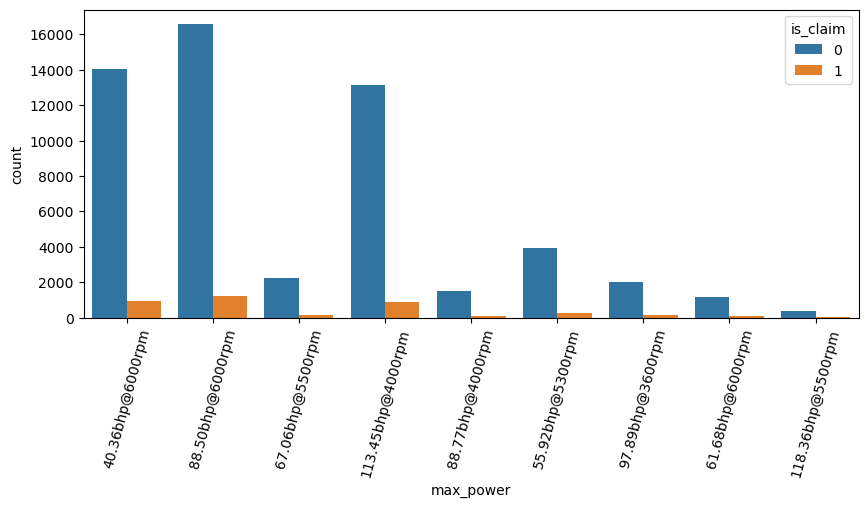

In [74]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'max_power',hue = 'is_claim',data =df)
plt.xticks(rotation = 75)
plt.show()

In [75]:
engine_type_ct = get_precentage_target(df['engine_type'],df['is_claim'])
engine_type_ct

is_claim,0,1,All,Percentage_of_claim_filed
engine_type,,,,
1.0 SCe,2245,128,2373,5.394016
1.2 L K Series Engine,2739,201,2940,6.836735
1.2 L K12N Dualjet,1000,80,1080,7.407407
1.5 L U2 CRDi,13117,901,14018,6.427450
1.5 Turbocharged Revotorq,1482,116,1598,7.259074
1.5 Turbocharged Revotron,348,15,363,4.132231
F8D Petrol Engine,14030,918,14948,6.141290
G12B,1136,73,1209,6.038048
K Series Dual jet,12837,939,13776,6.816202


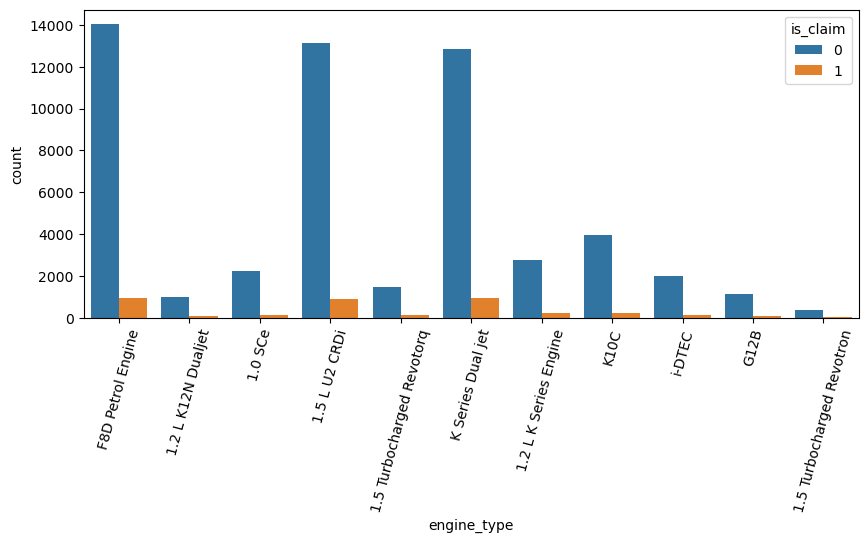

In [76]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'engine_type',hue = 'is_claim',data =df)
plt.xticks(rotation = 75)
plt.show()

- Type of fuel doesnt seem to have any effect on claims filed.
- Max torque does affect the claims filed as cars with 200Nm@3000rpm have the highest percent of claims filed.
  while cars with 170Nm@4000rpm have the lowest percent of claims filed.
- Cars with power 88.77bhp@4000rpm file the highest percent of claims while cars with power of 118.36bhp@5500rpm have the     lowest percent of claims filed.
- cars with engines '1.5 Turbocharged Revotorq' and '1.2 L K12N Dualjet' file the highest percent of claims while "1.5 Turbocharged Revotron" has lowest percent of claims filed

In [77]:
airbags_ct = get_precentage_target(df['airbags'],df['is_claim'])
airbags_ct

is_claim,0,1,All,Percentage_of_claim_filed
airbags,,,,
1,1136,73,1209,6.038048
2,37852,2573,40425,6.364873
6,15856,1102,16958,6.498408
All,54844,3748,58592,6.396778


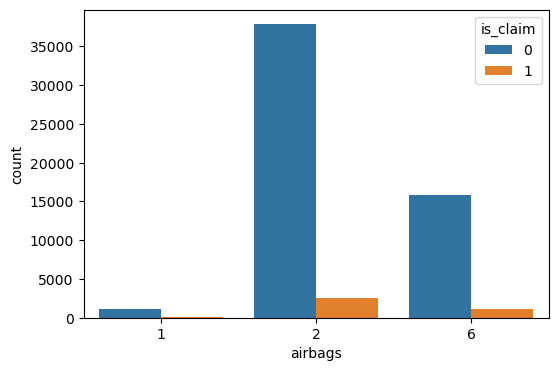

In [78]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'airbags',hue = 'is_claim',data =df)

plt.show()

In [79]:
is_esc_ct = get_precentage_target(df['is_esc'],df['is_claim'])
is_esc_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_esc,,,,
No,37640,2551,40191,6.347192
Yes,17204,1197,18401,6.505081
All,54844,3748,58592,6.396778


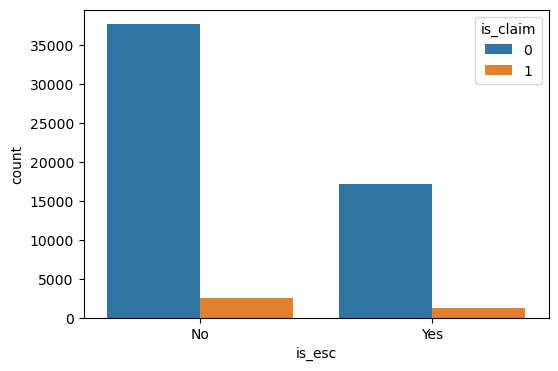

In [80]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_esc',hue = 'is_claim',data =df)

plt.show()

In [81]:
is_adjustable_steering_ct = get_precentage_target(df['is_adjustable_steering'],df['is_claim'])
is_adjustable_steering_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_adjustable_steering,,,,
No,21688,1378,23066,5.974161
Yes,33156,2370,35526,6.671170
All,54844,3748,58592,6.396778


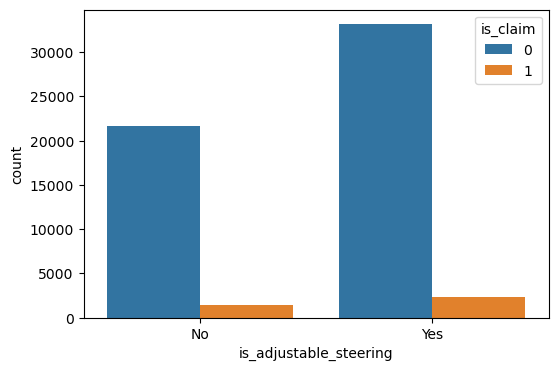

In [82]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_adjustable_steering',hue = 'is_claim',data =df)

plt.show()

In [83]:
is_tpms_ct = get_precentage_target(df['is_tpms'],df['is_claim'])
is_tpms_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_tpms,,,,
No,41727,2847,44574,6.387132
Yes,13117,901,14018,6.427450
All,54844,3748,58592,6.396778


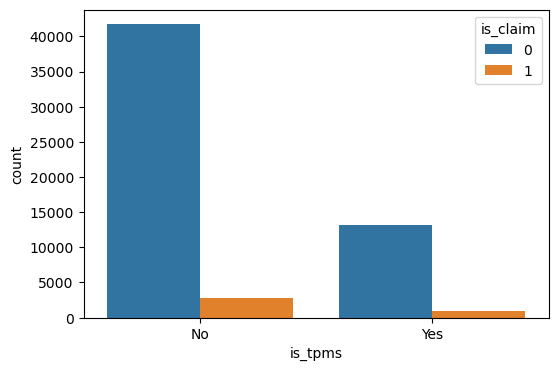

In [84]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_tpms',hue = 'is_claim',data =df)

plt.show()

In [85]:
is_parking_sensors_ct = get_precentage_target(df['is_parking_sensors'],df['is_claim'])
is_parking_sensors_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_parking_sensors,,,,
No,2245,128,2373,5.394016
Yes,52599,3620,56219,6.439104
All,54844,3748,58592,6.396778


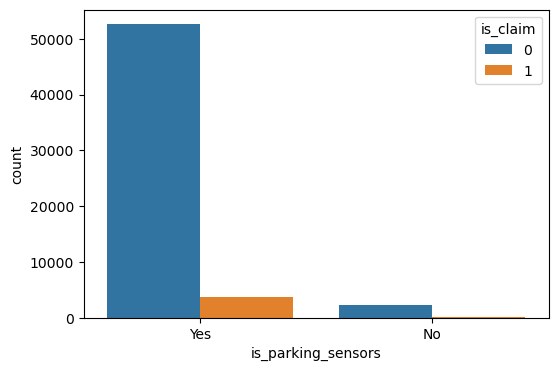

In [86]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_parking_sensors',hue = 'is_claim',data =df)

plt.show()

In [87]:
is_parking_camera_ct = get_precentage_target(df['is_parking_camera'],df['is_claim'])
is_parking_camera_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_parking_camera,,,,
No,33414,2290,35704,6.413847
Yes,21430,1458,22888,6.370150
All,54844,3748,58592,6.396778


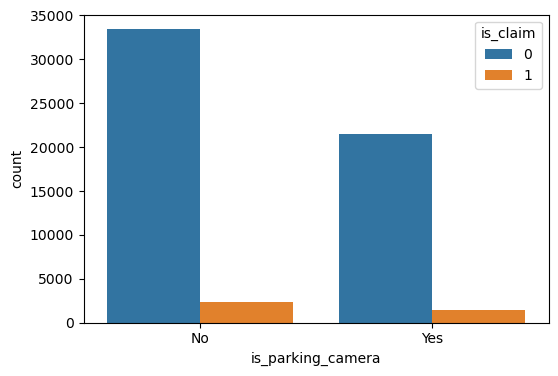

In [88]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_parking_camera',hue = 'is_claim',data =df)

plt.show()

In [89]:
rear_brakes_type_ct = get_precentage_target(df['rear_brakes_type'],df['is_claim'])
rear_brakes_type_ct

is_claim,0,1,All,Percentage_of_claim_filed
rear_brakes_type,,,,
Disc,13117,901,14018,6.427450
Drum,41727,2847,44574,6.387132
All,54844,3748,58592,6.396778


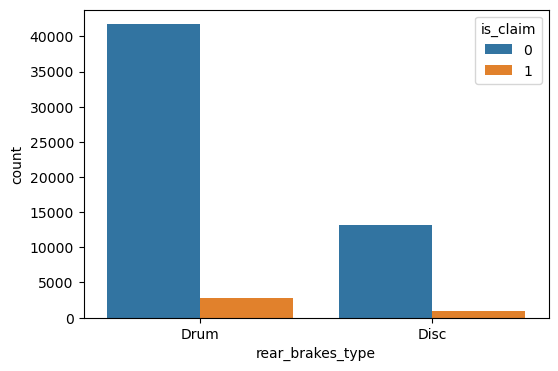

In [90]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'rear_brakes_type',hue = 'is_claim',data =df)

plt.show()

In [91]:
displacement_ct = get_precentage_target(df['displacement'],df['is_claim'])
displacement_ct

is_claim,0,1,All,Percentage_of_claim_filed
displacement,,,,
796,14030,918,14948,6.141290
998,3929,244,4173,5.847112
999,2245,128,2373,5.394016
1196,1136,73,1209,6.038048
1197,16576,1220,17796,6.855473
1199,348,15,363,4.132231
1493,13117,901,14018,6.427450
1497,1482,116,1598,7.259074
1498,1981,133,2114,6.291391


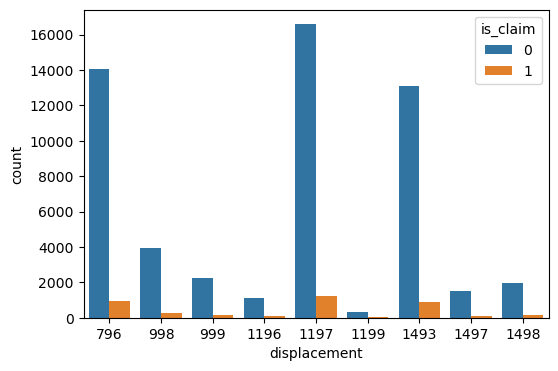

In [92]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'displacement',hue = 'is_claim',data =df)

plt.show()

In [93]:
cylinder_ct = get_precentage_target(df['cylinder'],df['is_claim'])
cylinder_ct

is_claim,0,1,All,Percentage_of_claim_filed
cylinder,,,,
3,20552,1305,21857,5.970627
4,34292,2443,36735,6.650333
All,54844,3748,58592,6.396778


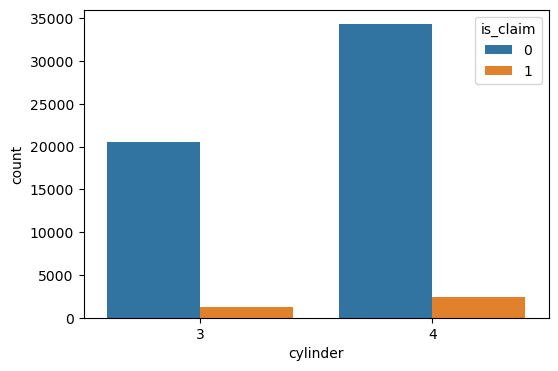

In [94]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'cylinder',hue = 'is_claim',data =df)

plt.show()

In [95]:
transmission_type_ct = get_precentage_target(df['transmission_type'],df['is_claim'])
transmission_type_ct

is_claim,0,1,All,Percentage_of_claim_filed
transmission_type,,,,
Automatic,19101,1310,20411,6.418108
Manual,35743,2438,38181,6.385375
All,54844,3748,58592,6.396778


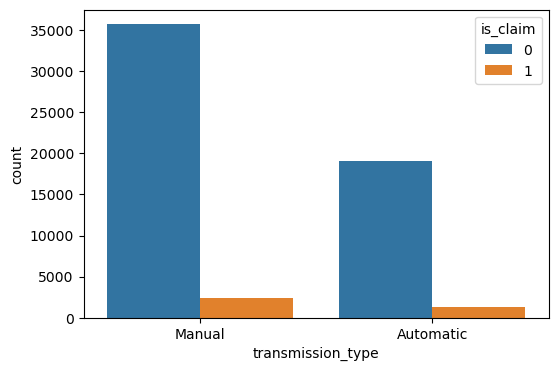

In [96]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'transmission_type',hue = 'is_claim',data =df)

plt.show()

In [97]:
gear_box_ct = get_precentage_target(df['gear_box'],df['is_claim'])
gear_box_ct

is_claim,0,1,All,Percentage_of_claim_filed
gear_box,,,,
5,41379,2832,44211,6.405646
6,13465,916,14381,6.369515
All,54844,3748,58592,6.396778


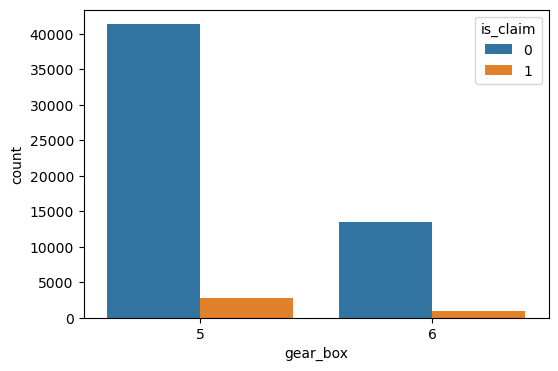

In [98]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'gear_box',hue = 'is_claim',data =df)

plt.show()

In [99]:
steering_type_ct = get_precentage_target(df['steering_type'],df['is_claim'])
steering_type_ct

is_claim,0,1,All,Percentage_of_claim_filed
steering_type,,,,
Electric,22284,1597,23881,6.687325
Manual,1136,73,1209,6.038048
Power,31424,2078,33502,6.202615
All,54844,3748,58592,6.396778


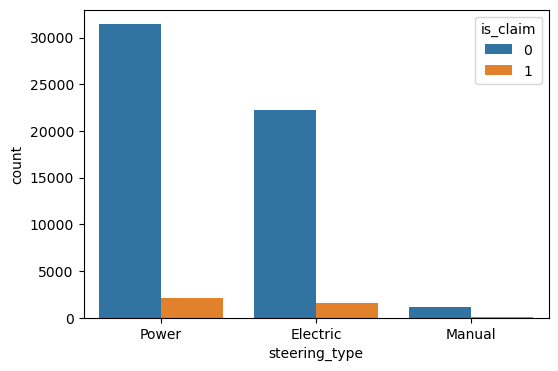

In [100]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'steering_type',hue = 'is_claim',data =df)

plt.show()

In [101]:
turning_radius_ct = get_precentage_target(df['turning_radius'],df['is_claim'])
turning_radius_ct

is_claim,0,1,All,Percentage_of_claim_filed
turning_radius,,,,
4.5,1136,73,1209,6.038048
4.6,14030,918,14948,6.141290
4.7,3929,244,4173,5.847112
4.8,13837,1019,14856,6.859181
4.85,2739,201,2940,6.836735
4.9,1981,133,2114,6.291391
5.0,3727,244,3971,6.144548
5.1,348,15,363,4.132231
5.2,13117,901,14018,6.427450


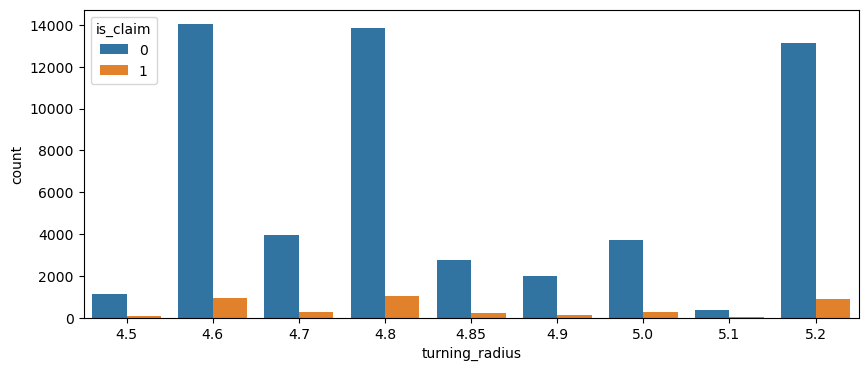

In [102]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'turning_radius',hue = 'is_claim',data =df)

plt.show()

In [103]:
length_ct = get_precentage_target(df['length'],df['is_claim'])
length_ct

is_claim,0,1,All,Percentage_of_claim_filed
length,,,,
3445,14030,918,14948,6.141290
3655,3929,244,4173,5.847112
3675,1136,73,1209,6.038048
3731,2245,128,2373,5.394016
3845,12837,939,13776,6.816202
3990,4221,317,4538,6.985456
3993,348,15,363,4.132231
3995,2981,213,3194,6.668754
4300,13117,901,14018,6.427450


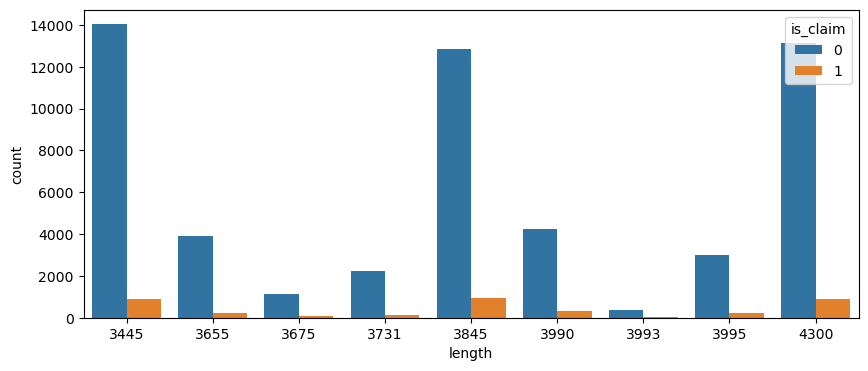

In [104]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'length',hue = 'is_claim',data =df)

plt.show()

In [105]:
width_ct = get_precentage_target(df['width'],df['is_claim'])
width_ct

is_claim,0,1,All,Percentage_of_claim_filed
width,,,,
1475,1136,73,1209,6.038048
1515,14030,918,14948,6.141290
1579,2245,128,2373,5.394016
1620,3929,244,4173,5.847112
1695,1981,133,2114,6.291391
1735,13837,1019,14856,6.859181
1745,2739,201,2940,6.836735
1755,1482,116,1598,7.259074
1790,13117,901,14018,6.427450


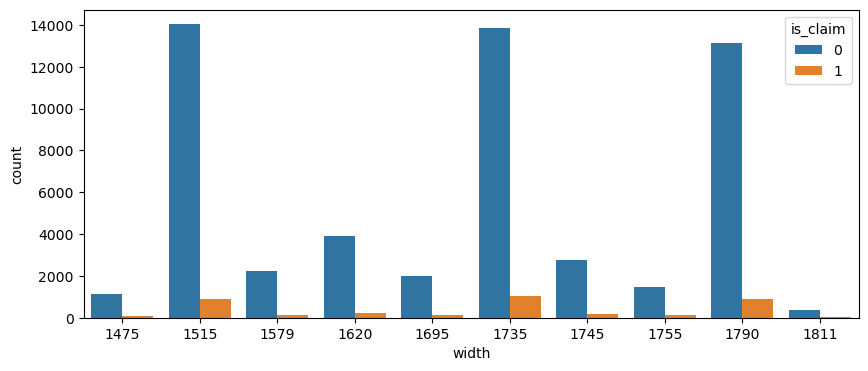

In [106]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'width',hue = 'is_claim',data =df)

plt.show()

In [107]:
height_ct = get_precentage_target(df['height'],df['is_claim'])
height_ct

is_claim,0,1,All,Percentage_of_claim_filed
height,,,,
1475,14030,918,14948,6.141290
1490,2245,128,2373,5.394016
1500,2739,201,2940,6.836735
1501,1981,133,2114,6.291391
1515,1000,80,1080,7.407407
1523,1482,116,1598,7.259074
1530,12837,939,13776,6.816202
1606,348,15,363,4.132231
1635,13117,901,14018,6.427450


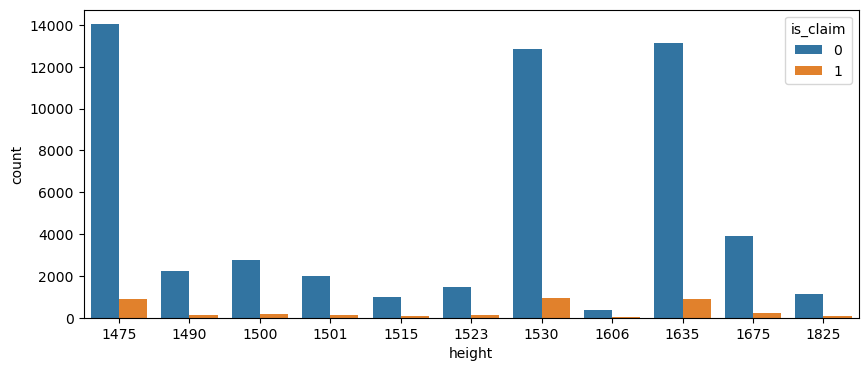

In [108]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'height',hue = 'is_claim',data =df)

plt.show()

In [109]:
height_ct = get_precentage_target(df['height'],df['is_claim'])
height_ct

is_claim,0,1,All,Percentage_of_claim_filed
height,,,,
1475,14030,918,14948,6.141290
1490,2245,128,2373,5.394016
1500,2739,201,2940,6.836735
1501,1981,133,2114,6.291391
1515,1000,80,1080,7.407407
1523,1482,116,1598,7.259074
1530,12837,939,13776,6.816202
1606,348,15,363,4.132231
1635,13117,901,14018,6.427450


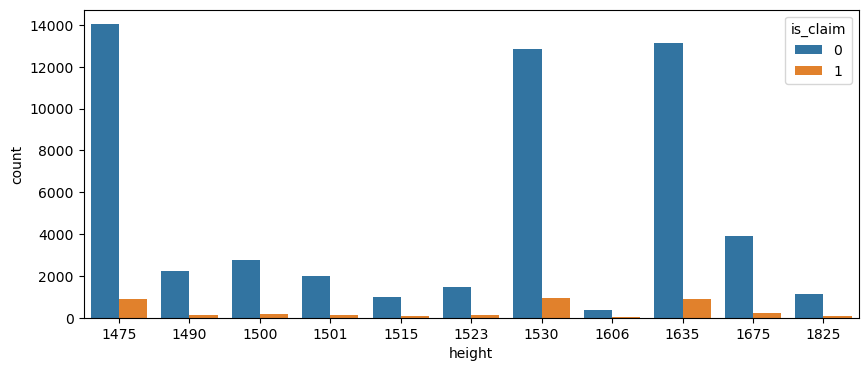

In [110]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'height',hue = 'is_claim',data =df)

plt.show()

In [111]:
gross_weight_ct = get_precentage_target(df['gross_weight'],df['is_claim'])
gross_weight_ct

is_claim,0,1,All,Percentage_of_claim_filed
gross_weight,,,,
1051,1981,133,2114,6.291391
1155,2245,128,2373,5.394016
1185,14030,918,14948,6.141290
1335,13837,1019,14856,6.859181
1340,3929,244,4173,5.847112
1410,2739,201,2940,6.836735
1490,1482,116,1598,7.259074
1510,1136,73,1209,6.038048
1660,348,15,363,4.132231


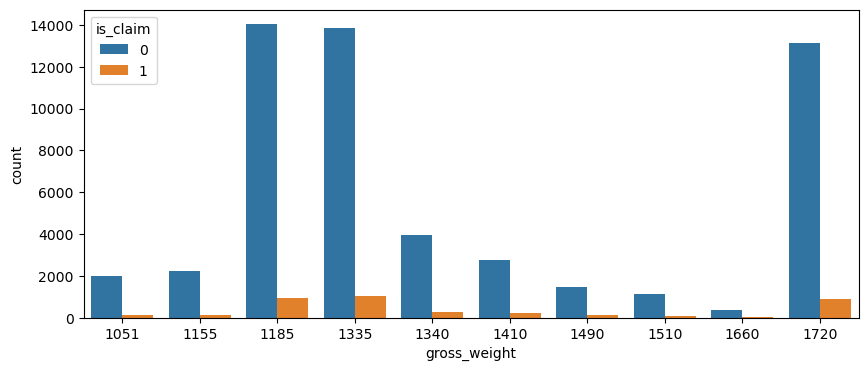

In [112]:
plt.figure(figsize = [10,4])
sns.countplot(x = 'gross_weight',hue = 'is_claim',data =df)

plt.show()

In [113]:
is_front_fog_lights_ct = get_precentage_target(df['is_front_fog_lights'],df['is_claim'])
is_front_fog_lights_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_front_fog_lights,,,,
No,23170,1494,24664,6.057412
Yes,31674,2254,33928,6.643480
All,54844,3748,58592,6.396778


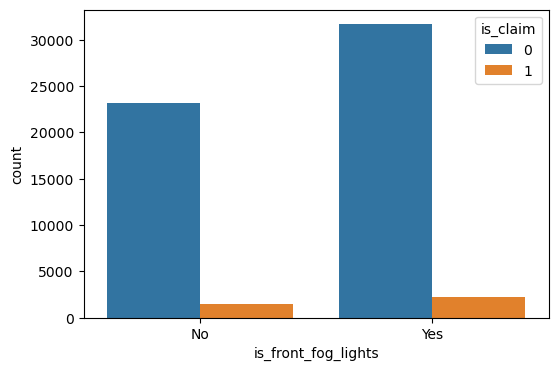

In [114]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_front_fog_lights',hue = 'is_claim',data =df)

plt.show()

In [115]:
is_rear_window_wiper_ct = get_precentage_target(df['is_rear_window_wiper'],df['is_claim'])
is_rear_window_wiper_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_rear_window_wiper,,,,
No,38988,2646,41634,6.355383
Yes,15856,1102,16958,6.498408
All,54844,3748,58592,6.396778


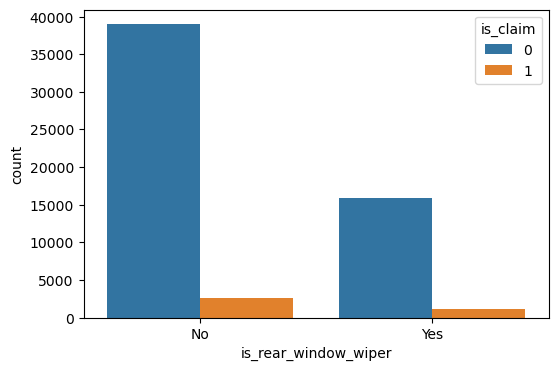

In [116]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_rear_window_wiper',hue = 'is_claim',data =df)

plt.show()

In [117]:
is_rear_window_washer_ct = get_precentage_target(df['is_rear_window_washer'],df['is_claim'])
is_rear_window_washer_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_rear_window_washer,,,,
No,38988,2646,41634,6.355383
Yes,15856,1102,16958,6.498408
All,54844,3748,58592,6.396778


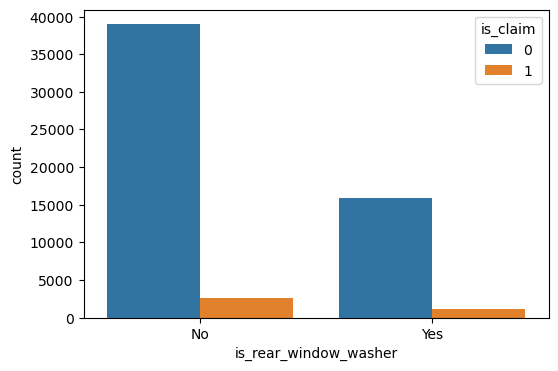

In [118]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_rear_window_washer',hue = 'is_claim',data =df)

plt.show()

In [119]:
is_rear_window_defogger_ct = get_precentage_target(df['is_rear_window_defogger'],df['is_claim'])
is_rear_window_defogger_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_rear_window_defogger,,,,
No,35659,2418,38077,6.350290
Yes,19185,1330,20515,6.483061
All,54844,3748,58592,6.396778


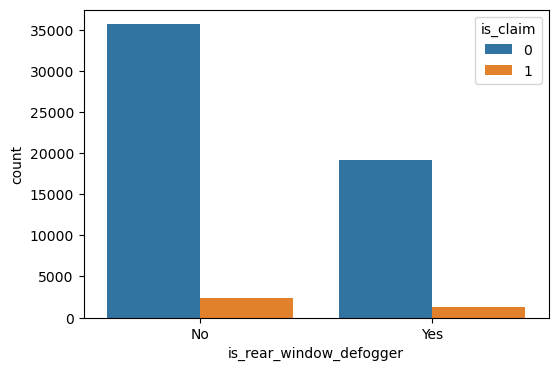

In [120]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_rear_window_defogger',hue = 'is_claim',data =df)

plt.show()

In [121]:
is_brake_assist_ct = get_precentage_target(df['is_brake_assist'],df['is_claim'])
is_brake_assist_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_brake_assist,,,,
No,24803,1612,26415,6.102593
Yes,30041,2136,32177,6.638282
All,54844,3748,58592,6.396778


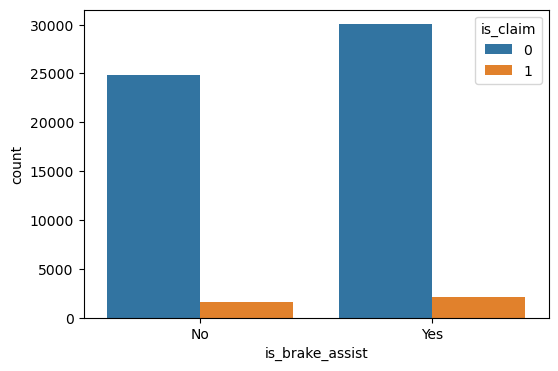

In [122]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_brake_assist',hue = 'is_claim',data =df)

plt.show()

In [123]:
is_power_door_locks_ct = get_precentage_target(df['is_power_door_locks'],df['is_claim'])
is_power_door_locks_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_power_door_locks,,,,
No,15166,991,16157,6.133564
Yes,39678,2757,42435,6.496995
All,54844,3748,58592,6.396778


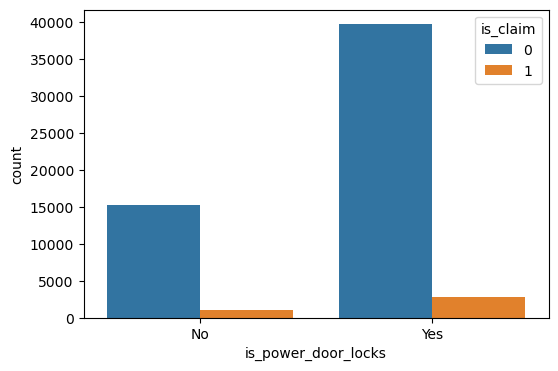

In [124]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_power_door_locks',hue = 'is_claim',data =df)

plt.show()

In [125]:
is_central_locking_ct = get_precentage_target(df['is_central_locking'],df['is_claim'])
is_central_locking_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_central_locking,,,,
No,15166,991,16157,6.133564
Yes,39678,2757,42435,6.496995
All,54844,3748,58592,6.396778


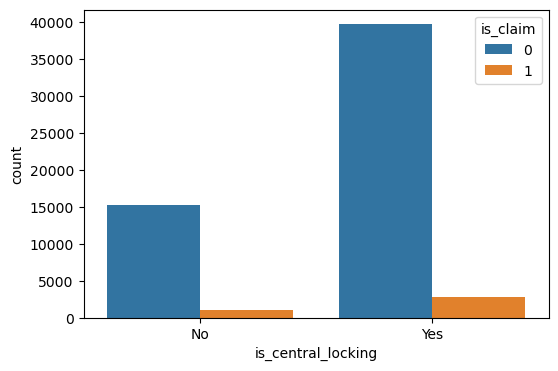

In [126]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_central_locking',hue = 'is_claim',data =df)

plt.show()

In [127]:
is_power_steering_ct = get_precentage_target(df['is_power_steering'],df['is_claim'])
is_power_steering_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_power_steering,,,,
No,1136,73,1209,6.038048
Yes,53708,3675,57383,6.404336
All,54844,3748,58592,6.396778


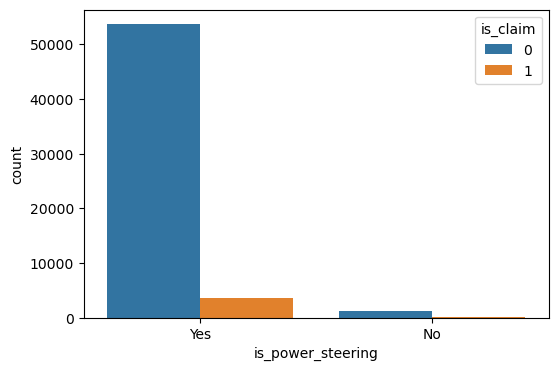

In [128]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_power_steering',hue = 'is_claim',data =df)

plt.show()

In [129]:
is_driver_seat_height_adjustable_ct = get_precentage_target(df['is_driver_seat_height_adjustable'],df['is_claim'])
is_driver_seat_height_adjustable_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_driver_seat_height_adjustable,,,,
No,22822,1479,24301,6.086169
Yes,32022,2269,34291,6.616897
All,54844,3748,58592,6.396778


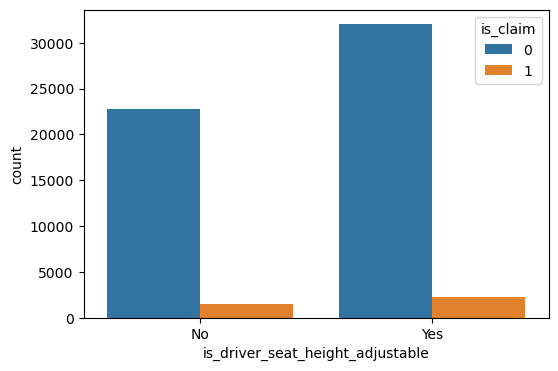

In [130]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_driver_seat_height_adjustable',hue = 'is_claim',data =df)

plt.show()

In [131]:
is_day_night_rear_view_mirror_ct = get_precentage_target(df['is_day_night_rear_view_mirror'],df['is_claim'])
is_day_night_rear_view_mirror_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_day_night_rear_view_mirror,,,,
No,34042,2267,36309,6.243631
Yes,20802,1481,22283,6.646322
All,54844,3748,58592,6.396778


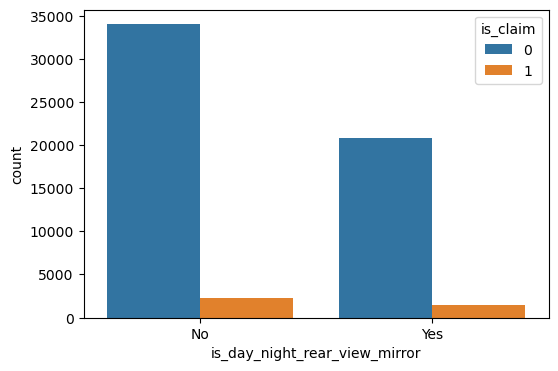

In [132]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_day_night_rear_view_mirror',hue = 'is_claim',data =df)

plt.show()

In [133]:
is_ecw_ct = get_precentage_target(df['is_ecw'],df['is_claim'])
is_ecw_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_ecw,,,,
No,15166,991,16157,6.133564
Yes,39678,2757,42435,6.496995
All,54844,3748,58592,6.396778


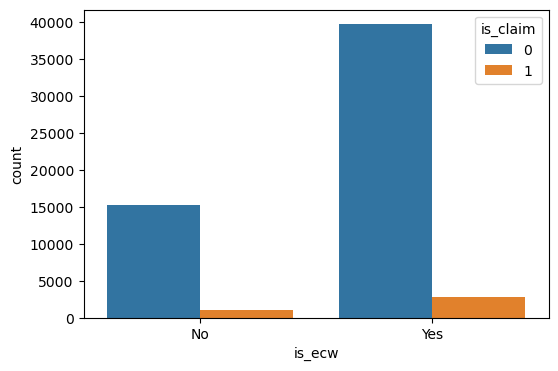

In [134]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_ecw',hue = 'is_claim',data =df)

plt.show()

In [135]:
is_speed_alert_ct = get_precentage_target(df['is_speed_alert'],df['is_claim'])
is_speed_alert_ct

is_claim,0,1,All,Percentage_of_claim_filed
is_speed_alert,,,,
No,348,15,363,4.132231
Yes,54496,3733,58229,6.410895
All,54844,3748,58592,6.396778


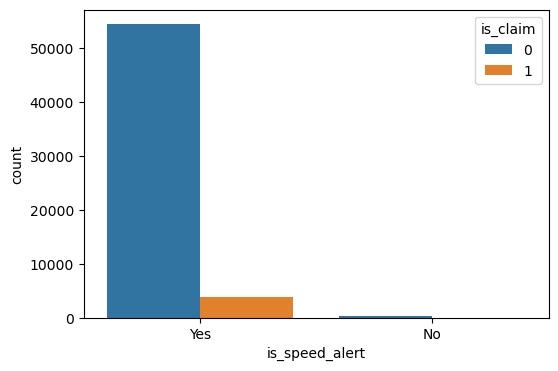

In [136]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'is_speed_alert',hue = 'is_claim',data =df)

plt.show()

In [137]:
ncap_rating_ct = get_precentage_target(df['ncap_rating'],df['is_claim'])
ncap_rating_ct

is_claim,0,1,All,Percentage_of_claim_filed
ncap_rating,,,,
0,17905,1192,19097,6.241818
2,20011,1391,21402,6.499393
3,13117,901,14018,6.427450
4,1981,133,2114,6.291391
5,1830,131,1961,6.680265
All,54844,3748,58592,6.396778


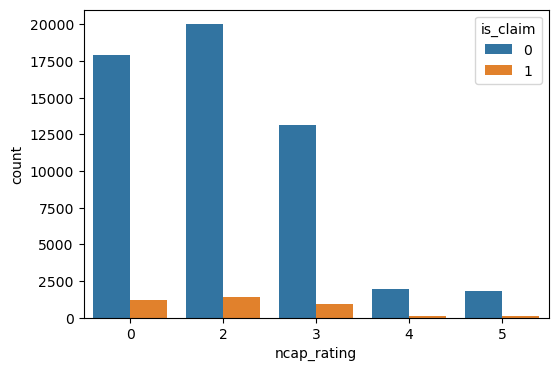

In [138]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'ncap_rating',hue = 'is_claim',data =df)

plt.show()

## Multivariate Analysis

<AxesSubplot:>

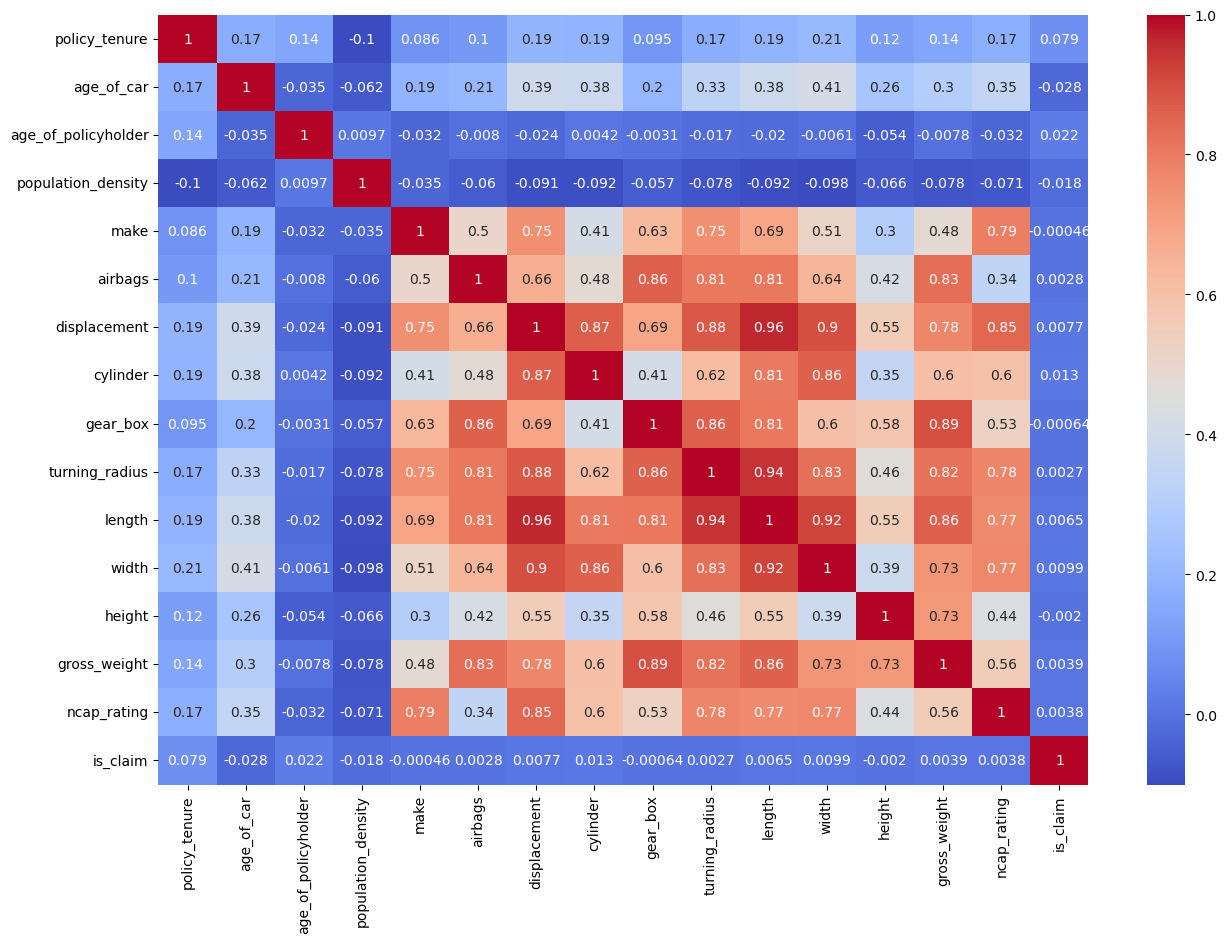

In [139]:
plt.figure(figsize = [15,10])
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

- As we can see length has Moderate to high correaltion with make, airbags, cylinder, gear box,gross weight and ncap rating
- It also has very high correaltion with displacment,turning radius and width. 
- We can drop all these columns because they contain almost the same information which inturn could hamper the performance of the model
- Policy ID can be dropped too.

# Data Preprocessing

## Droping columns with high correlation

In [140]:
removed_cols = []
df.drop(['policy_id','make','airbags','displacement', 'cylinder','gear_box','turning_radius',
        "width",'gross_weight','ncap_rating'],axis = 1,inplace =True)
removed_cols.extend(["policy_id",'make','airbags','displacement', 'cylinder','gear_box','turning_radius',"width",
                    'gross_weight','ncap_rating'])

<AxesSubplot:>

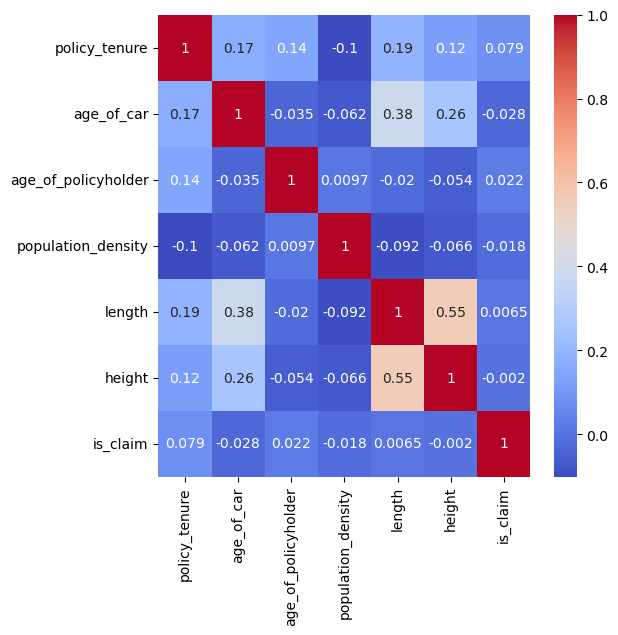

In [141]:
plt.figure(figsize = [6,6])
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

## Scaling

In [142]:
num_col_names = [i for i in num_col_names if i not in removed_cols and i != 'is_claim']

In [143]:
ss = StandardScaler()
ss.fit(df[num_col_names])
df[num_col_names] = ss.transform(df[num_col_names])

In [144]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,length,height,is_claim
count,5.859200e+04,5.859200e+04,5.859200e+04,5.859200e+04,5.859200e+04,5.859200e+04,58592.000000
mean,-4.248831e-16,-1.080322e-16,-3.430375e-16,1.130915e-16,-9.573779e-16,-5.852963e-16,0.063968
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.244698
min,-1.469290e+00,-1.223968e+00,-1.472586e+00,-1.049651e+00,-1.301882e+00,-9.838458e-01,0.000000
25%,-9.682330e-01,-8.713593e-01,-8.466092e-01,-7.199797e-01,-1.301882e+00,-9.838458e-01,0.000000
50%,-9.043636e-02,-1.661427e-01,-1.423851e-01,-5.681113e-01,-1.758489e-02,-2.930784e-01,0.000000
75%,1.033092e+00,7.153780e-01,6.400861e-01,4.629745e-01,4.640265e-01,1.025659e+00,0.000000
max,1.896389e+00,1.640645e+01,4.317701e+00,3.091906e+00,1.443303e+00,3.411947e+00,1.000000


## Encoding

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   segment                           58592 non-null  object 
 6   model                             58592 non-null  object 
 7   fuel_type                         58592 non-null  object 
 8   max_torque                        58592 non-null  object 
 9   max_power                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  is_esc                            58592 non-null  object 
 12  is_a

In [146]:
ohe = OneHotEncoder(sparse =False , min_frequency = 0.1,handle_unknown = 'infrequent_if_exist')

In [147]:
ohe.fit(df[obj_no_id_names])

OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.1,
              sparse=False, sparse_output=False)

In [148]:
enc_cols = pd.DataFrame(ohe.transform(df[obj_no_id_names]))
enc_cols.columns = ohe.get_feature_names_out(obj_no_id_names)
enc_cols

,area_cluster_C2,area_cluster_C3,area_cluster_C5,area_cluster_C8,area_cluster_infrequent_sklearn,segment_A,segment_B2,segment_C2,segment_infrequent_sklearn,model_M1,model_M4,model_M6,model_infrequent_sklearn,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_infrequent_sklearn,max_power_113.45bhp@4000rpm,max_power_40.36bhp@6000rpm,max_power_88.50bhp@6000rpm,max_power_infrequent_sklearn,engine_type_1.5 L U2 CRDi,engine_type_F8D Petrol Engine,engine_type_K Series Dual jet,engine_type_infrequent_sklearn,is_esc_No,is_esc_Yes,is_adjustable_steering_No,is_adjustable_steering_Yes,is_tpms_No,is_tpms_Yes,is_parking_sensors_Yes,is_parking_sensors_infrequent_sklearn,is_parking_camera_No,is_parking_camera_Yes,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Power,steering_type_infrequent_sklearn,is_front_fog_lights_No,is_front_fog_lights_Yes,is_rear_window_wiper_No,is_rear_window_wiper_Yes,is_rear_window_washer_No,is_rear_window_washer_Yes,is_rear_window_defogger_No,is_rear_window_defogger_Yes,is_brake_assist_No,is_brake_assist_Yes,is_power_door_locks_No,is_power_door_locks_Yes,is_central_locking_No,is_central_locking_Yes,is_power_steering_Yes,is_power_steering_infrequent_sklearn,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_Yes,is_speed_alert_infrequent_sklearn
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
58588,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
58589,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,

In [149]:
df.drop(obj_no_id_names,axis = 1,inplace = True)
df = pd.concat([df,enc_cols],axis = 1)

In [150]:
df.shape

(58592, 76)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 76 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  float64
 4   length                                 58592 non-null  float64
 5   height                                 58592 non-null  float64
 6   is_claim                               58592 non-null  int64  
 7   area_cluster_C2                        58592 non-null  float64
 8   area_cluster_C3                        58592 non-null  float64
 9   area_cluster_C5                        58592 non-null  float64
 10  area_cluster_C8                        58592 non-null  float64
 11  ar

# Model building


In [152]:
x = df.drop('is_claim',axis = 1)
y = df['is_claim']

In [153]:
osm = SMOTE()

In [154]:
x_over,y_over = osm.fit_resample(x,y)

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2,random_state = 1000,stratify= y_over )

In [156]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


In [157]:
%%time
param_dtc = {"max_depth":[500,750,1000],
            "min_samples_split":[20,25,30],
            'class_weight':[ 'balanced',{0:1, 1:10}, {0:1, 1:12},{0:0.5,1:11.5}],
            }


search_dtc = GridSearchCV(estimator = dtc,
                         param_grid = param_dtc,
                         scoring = 'f1_weighted',
                         return_train_score=True,
                         cv = 5)

search_dtc.fit(x_over,y_over)

In [ ]:
pd.set_option('display.max_colwidth', -1)
result_dtc = pd.DataFrame(search_dtc.cv_results_)
result_dtc = result_dtc[['rank_test_score','params','mean_train_score','mean_test_score']].sort_values(by = 'rank_test_score')
result_dtc

In [159]:
best_dtc = DecisionTreeClassifier(class_weight = 'balanced', max_depth =  500, min_samples_split= 25)
best_dtc.fit(x_train,y_train)  

DecisionTreeClassifier(class_weight='balanced', max_depth=500,
                       min_samples_split=25)

In [160]:
pred_train_dtc = best_dtc.predict(x_train)
pred_test_dtc = best_dtc.predict(x_test)

In [161]:
print("******************************")
print('Traning classifcation report')
print(classification_report(pred_train_dtc,y_train))
print('Testing classification report')
print(classification_report(pred_test_dtc,y_test))

******************************
Traning classifcation report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     45139
           1       0.92      0.95      0.94     42611

    accuracy                           0.94     87750
   macro avg       0.94      0.94      0.94     87750
weighted avg       0.94      0.94      0.94     87750

Testing classification report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     11325
           1       0.88      0.91      0.89     10613

    accuracy                           0.89     21938
   macro avg       0.89      0.89      0.89     21938
weighted avg       0.89      0.89      0.89     21938



In [162]:
print(confusion_matrix(pred_test_dtc,y_test))

[[9966 1359]
 [1003 9610]]


In [ ]:
param_rfc = {"n_estimators":[50,100,150],
            "max_depth":[15,25,30],
            "min_samples_split":[20,25,30],
            'class_weight':['balanced'],
            'max_features':['sqrt', 'log2']
             
            }


search_rfc = GridSearchCV(estimator = rfc,
                         param_grid = param_rfc,
                         scoring = 'f1_weighted',
                         return_train_score=True,
                         cv = 5,
                         verbose=1,
                         n_jobs = -1 )

search_rfc.fit(x_over,y_over)

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows',500)
result_rfc = pd.DataFrame(search_rfc.cv_results_)
result_rfc = result_rfc[['rank_test_score','params','mean_train_score','mean_test_score']].sort_values(by = 'rank_test_score')
result_rfc

In [163]:
rfc_best = RandomForestClassifier( class_weight = 'balanced', max_depth = 40,
                                  max_features = 'sqrt', min_samples_split =  20, n_estimators= 750)

In [164]:
%%time
rfc_best.fit(x_train,y_train)

Wall time: 1min 54s


RandomForestClassifier(class_weight='balanced', max_depth=40,
                       min_samples_split=20, n_estimators=750)

In [165]:
pred_train_rfc = rfc_best.predict(x_train)
pred_test_rfc = rfc_best.predict(x_test)

In [166]:
print("******************************")
print('Traning classifcation report')
print(classification_report(pred_train_rfc,y_train))
print('Testing classification report')
print(classification_report(pred_test_rfc,y_test))

******************************
Traning classifcation report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     44082
           1       0.95      0.96      0.96     43668

    accuracy                           0.96     87750
   macro avg       0.96      0.96      0.96     87750
weighted avg       0.96      0.96      0.96     87750

Testing classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11027
           1       0.90      0.90      0.90     10911

    accuracy                           0.90     21938
   macro avg       0.90      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938



In [167]:
print(confusion_matrix(pred_test_rfc,y_test))

[[9876 1151]
 [1093 9818]]


In [168]:
xgb_model = XGBClassifier(alpha= 0.25, eta= 0.3, max_depth =  2,
                          min_child_weight = 17, n_estimators = 500, 
                          reg_lambda =  3)


xgb_model.fit(x_train,y_train)

XGBClassifier(alpha=0.25, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=17, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [169]:
pred_train_best = xgb_model.predict(x_train)
pred_test_best = xgb_model.predict(x_test)

In [171]:
print("******************************")
print('Traning classifcation report')
print(classification_report(pred_train_best,y_train))
print('Testing classification report')
print(classification_report(pred_test_best,y_test))

******************************
Traning classifcation report
              precision    recall  f1-score   support

           0       1.00      0.91      0.96     47975
           1       0.91      1.00      0.95     39775

    accuracy                           0.95     87750
   macro avg       0.95      0.96      0.95     87750
weighted avg       0.96      0.95      0.95     87750

Testing classification report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11968
           1       0.91      1.00      0.95      9970

    accuracy                           0.95     21938
   macro avg       0.95      0.96      0.95     21938
weighted avg       0.96      0.95      0.95     21938



In [172]:
print('roc_auc_score for decision tree is',roc_auc_score(y_test,best_dtc.predict_proba(x_test)[:, 1]))
print('roc_auc_score for random forest is',roc_auc_score(y_test,rfc_best.predict_proba(x_test)[:, 1]))
print('roc_auc_score for xgboost is',roc_auc_score(y_test,xgb_model.predict_proba(x_test)[:, 1]))

roc_auc_score for decision tree is 0.9467736801683317
roc_auc_score for random forest is 0.962535792675271
roc_auc_score for xgboost is 0.9760310347094836


In [173]:
print('Best Traning F1 Score = ',f1_score(y_train,pred_train_best))
print('Best Testing F1 Score = ',f1_score(y_test,pred_test_best))

Best Traning F1 Score =  0.9506037059175134
Best Testing F1 Score =  0.9520034385596255


In [174]:
print(confusion_matrix(pred_test_best,y_test))

[[10966  1002]
 [    3  9967]]


#### We can see that xgboost is the best model